# Configure environment

In [1]:
"""
Choose the dataset name (the dataset should be inside the folder /dataset in csv format)
The default dataset is: openml_203ds_datasets_matching
"""
dataset_name = "openml_203ds_datasets_matching"

"""
choose integer number of ratio negative/positive to sample (0 will use all negative pairs)
"""
neg_sample = 2
"""
Choose one split trategy ["isolation","random"] : 
- random will randomly spread positive node pairs in 80-20 fashion
- isolation will isolate 1 node from some topics in test (none pair in train will see these nodes).
The positive pairs will be splitted almost in 80-20%, like in the random case.
"""
strategy = "random"
"""
Choose to use the selected strategy to create a new split 
or reuse a previously created one (useful to repeat exact same experiment)
"""
create_new_split = False

"""
You can choose to use one of ["FASTTEXT","BERT"] as initial word_embedding encoding for the nodes in the datasets
"""
word_embedding_encoding = "FASTTEXT"

"""
These are the default values

dataset_name = "openml_203ds_datasets_matching"
neg_sample = 2
strategy = "random"
create_new_split = False #assumes splitted files exists already
word_embedding_encoding = "FASTTEXT"
"""
print("Env variables set")

#import libraries
from step3 import step3_gcnsm
from step3.step3_gcnsm import confusion_matrix as confusion_matrix
from step3.step3_gcnsm import train as train
from step3.step3_gcnsm import cross_validation as cross_validation
from step3.step3_gcnsm import test_mask, train_mask
from step3.step3_gcnsm import g
from step3 import step3_gcn_nn_concatenate as gcn_nn
from step3 import step3_gcn_loss as gcn_loss
from step3 import step3_gcn_training as gcn_training
from step3 import step3_plot_results as plot
# step3_gcnsm.load_env(ds_name=dataset_name,ns=neg_sample,st=strategy,sp=create_new_split,we=word_embedding_encoding)
print("\n SETUP IS READY")

Env variables set


Using backend: pytorch



 SETUP IS READY


In [3]:
gcn_nn.get_options()

{0: 'Bert2_400',
 1: 'Bert2_832_400_200_100',
 2: 'Bert2_832_600_400_200',
 3: 'Bert_300',
 4: 'Bert_300_300_200',
 5: 'Bert_768',
 6: 'Fasttext2',
 7: 'Fasttext2_150',
 8: 'Fasttext2_200_200',
 9: 'Fasttext2_200_200_100',
 10: 'Fasttext2_200_200_200',
 11: 'Fasttext2_200_200_200_100',
 12: 'Fasttext2_200_200_200_100_relu',
 13: 'Fasttext2_300_250_200_150',
 14: 'Fasttext2_364',
 15: 'Fasttext2_364_200_100',
 16: 'Fasttext2_364_200_100_relu',
 17: 'Fasttext2_364_300_200_100',
 18: 'Fasttext2_364_300_200_100_relu',
 19: 'Fasttext2_364_300_250_200',
 20: 'Fasttext2_3GCN_300_250_200_150',
 21: 'Fasttext2d_364',
 22: 'Fasttext3GCN_300',
 23: 'FasttextSum_150',
 24: 'FasttextSum_364_200_100',
 25: 'FasttextSum_364_300_200_100',
 26: 'FasttextSumd_150',
 27: 'Fasttext_150',
 28: 'Fasttext_150_150_100',
 29: 'Fasttext_200_200_200_100',
 30: 'Fasttext_300',
 31: 'Fasttext_300_200_100',
 32: 'Fasttext_300_250_200_150',
 33: 'Fasttext_3GCN',
 34: 'Fasttext_simple_300'}

# Choose NN architecture and loss function, then run tests

### Config and run training
### NN architectures: 

{<br>
    "0": "Bert_300", <br>
    "1": "Bert_300_300_200", <br>
    "2": "Bert_768", <br>
    "3": 'Fasttext2_150', <br>
    "4": "Fasttext3GCN_300" <br>
    "5": "Fasttext_150", <br>
    "6": "Fasttext_150_150_100", <br>
    "7": "Fasttext_300" <br>
}
### Loss functions: 
{<br>
    "0": "ContrastiveLoss", <br>
    "1": "CosineEmbeddingLoss", <br>
}

### Optimizer
{<br>
    "adam" (default)<br>
    "sgd"<br> 
}


### Loss functions parameters examples: format -> [margin]+[aggregation_function] 
{<br>
    0.9+mean, <br>
    0.7+mean, <br>
    0.5+mean, <br>
    0.3+mean, <br>
    0.9+sum, <br>
    0.7+sum, <br>
    0.5+sum, <br>
    0.3+sum, <br>
}

### batch_splits examples: 
{<br>
    64, <br>
    128, <br>
}
### learning rate examples (lr): 
{<br>
    1e-3, <br>
    1e-4, <br>
}

### Examples

In [ ]:
# #load model from path
# training = gcn_training.Training()
# training.load_state(path="./models/[file_name].pt")
# train(training,iterations=N)

# #train new model and specify parameters
# training = gcn_training.Training()
# training.set_training(
#             net_name= gcn_nn.get_option_name(),  #_of_option for NN architecture
#             batch_splits= ,#_of_sets(this will (give dataset / batch_splits) size of batch
#             lr= , #learning rate for training (e.g. 1e-3 )
#             loss_name=gcn_loss.get_option_name(), #_of_option for loss 
#             loss_parameters= ,#loss function parameters separated by '+' e.g. for cosine and contrastive "0.0+mean"
#             optimizer_name= ) #adam or sgd, default adam
# train(training,iterations=N)

## Print confusion matrix and results using the training object
#confusion_matrix(training.net, step3_gcnsm.g, step3_gcnsm.g.ndata['vector'], step3_gcnsm.test_mask,training.loss_name,threshold = 0.2)

### Test suite

## Plot results <br>

<p>This will plot charts of loss/accuracy for all the results that match the parameters options under the /results folder</p>

#### Parameters options

<p> Choose one of each and pass it to the corresponding plot function in the following order:

<b>1) neg_sample</b> = [1,2,3,4...etc] <br>
<b>2) db_name</b> = ["openml_203ds_datasets_matching"] <br>
<b>3) strategy</b> = ["isolation","random"] <br>
<b>4) archi</b> = ["Fasttext_150","Fasttext_300","Bert_300","Bert_768"] <br>
<b>5) optimizer</b> = ["adam","sgd"] <br>
<b>6) loss_functions</b> = ["ContrastiveLoss","CosineEmbeddingLoss"] <br>

#### Type of chart
<b>plot_by_loss_parameters:</b> groups in one chart the different results for loss functions parameters (margin) <br>
<b>plot_by_split </b>: groups in one chart the different results for size of batch splits <br>
<b>plot_cv </b>: plot the result of cross validation runs that were found

# Plot individual runs

# RANDOM

## 2

## 4

## 8

## 16

## 24

# ISOLATION

## 2

## 4

## 8

## 16

## 24

# CROSS VALIDATION

# Isolation

## CV1

In [ ]:
archi = ["Fasttext_150","Fasttext_300","Fasttext_300_250_200_150","Fasttext2_150","Fasttext2_364","FasttextSum_150","Fasttext2_200_200_200_100","Fasttext2_364_300_200_100","Fasttext2_364_200_100","FasttextSum_364_300_200_100","Fasttext2_300_250_200_150","FasttextSum_300_250_200_150","Fasttext2_364_300_250_200"]
for a in archi:
    plot.plot_cv_details(1,"openml_203ds_datasets_matching","isolation",a,"sgd","ContrastiveLoss")

In [ ]:
archi = ["Fasttext_150","Fasttext_300","Fasttext_300_250_200_150","Fasttext2_150","Fasttext2_364","FasttextSum_150","Fasttext2_200_200_200_100","Fasttext2_364_300_200_100","Fasttext2_364_200_100","FasttextSum_364_300_200_100","Fasttext2_300_250_200_150","FasttextSum_300_250_200_150","Fasttext2_364_300_250_200"]
for a in archi:
    plot.plot_cv_details(1,"openml_203ds_datasets_matching","isolation",a,"sgd","CosineEmbeddingLoss")

## CV 2

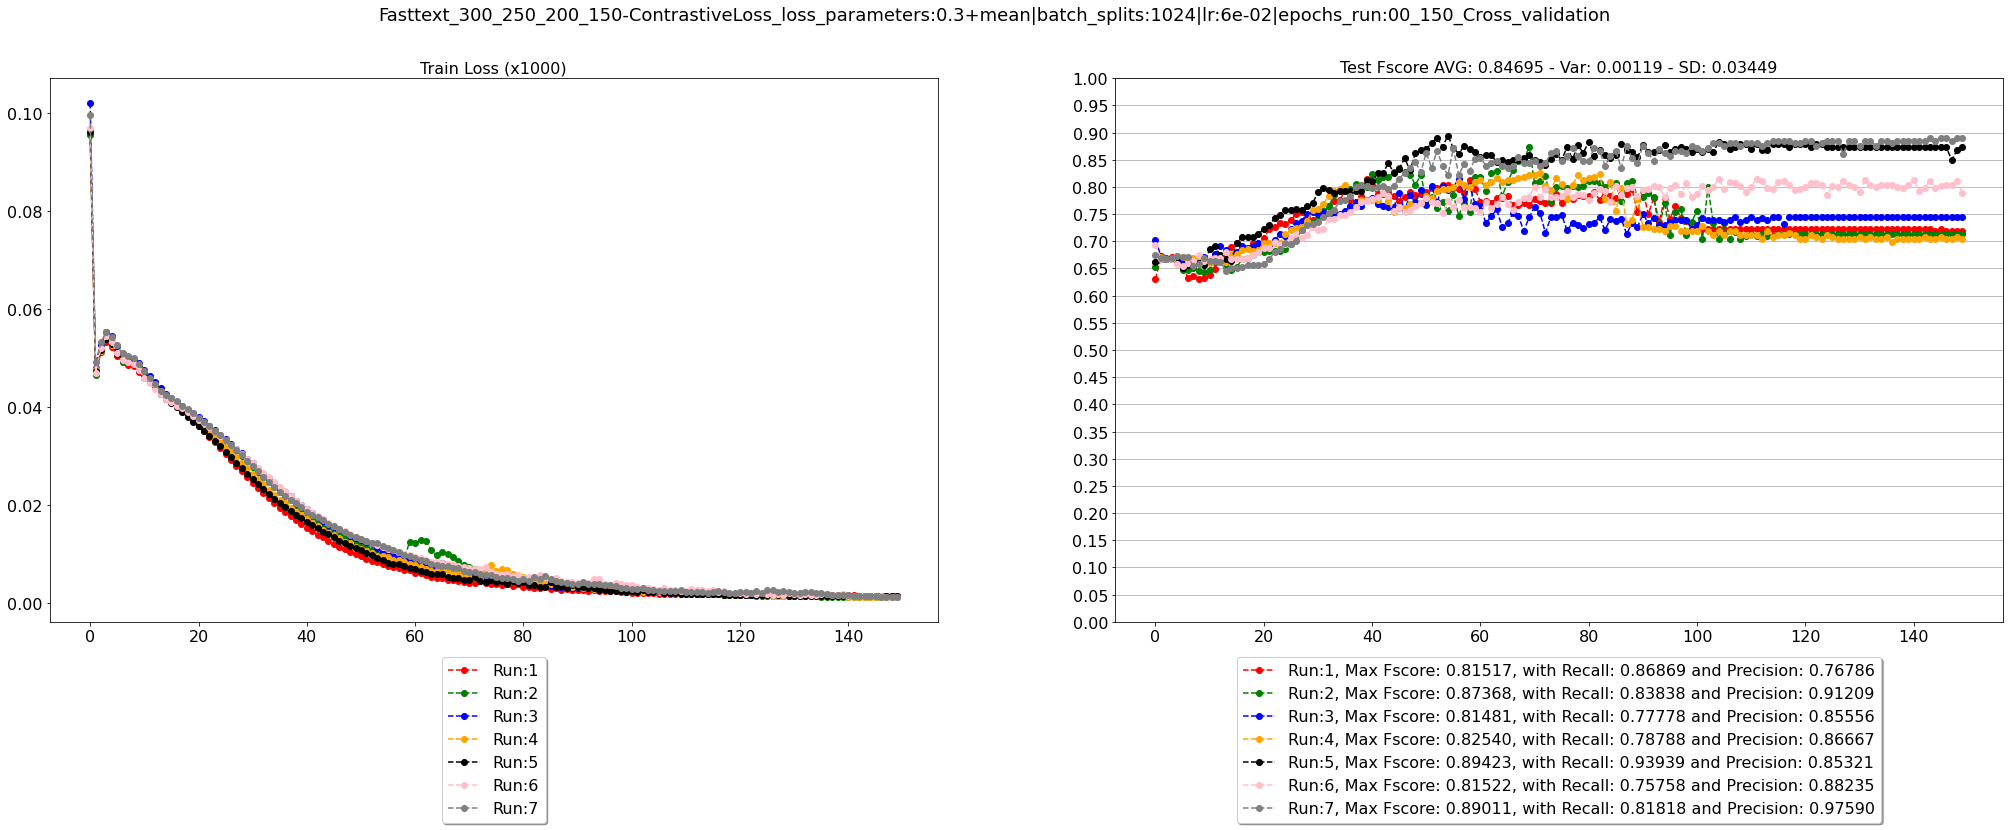

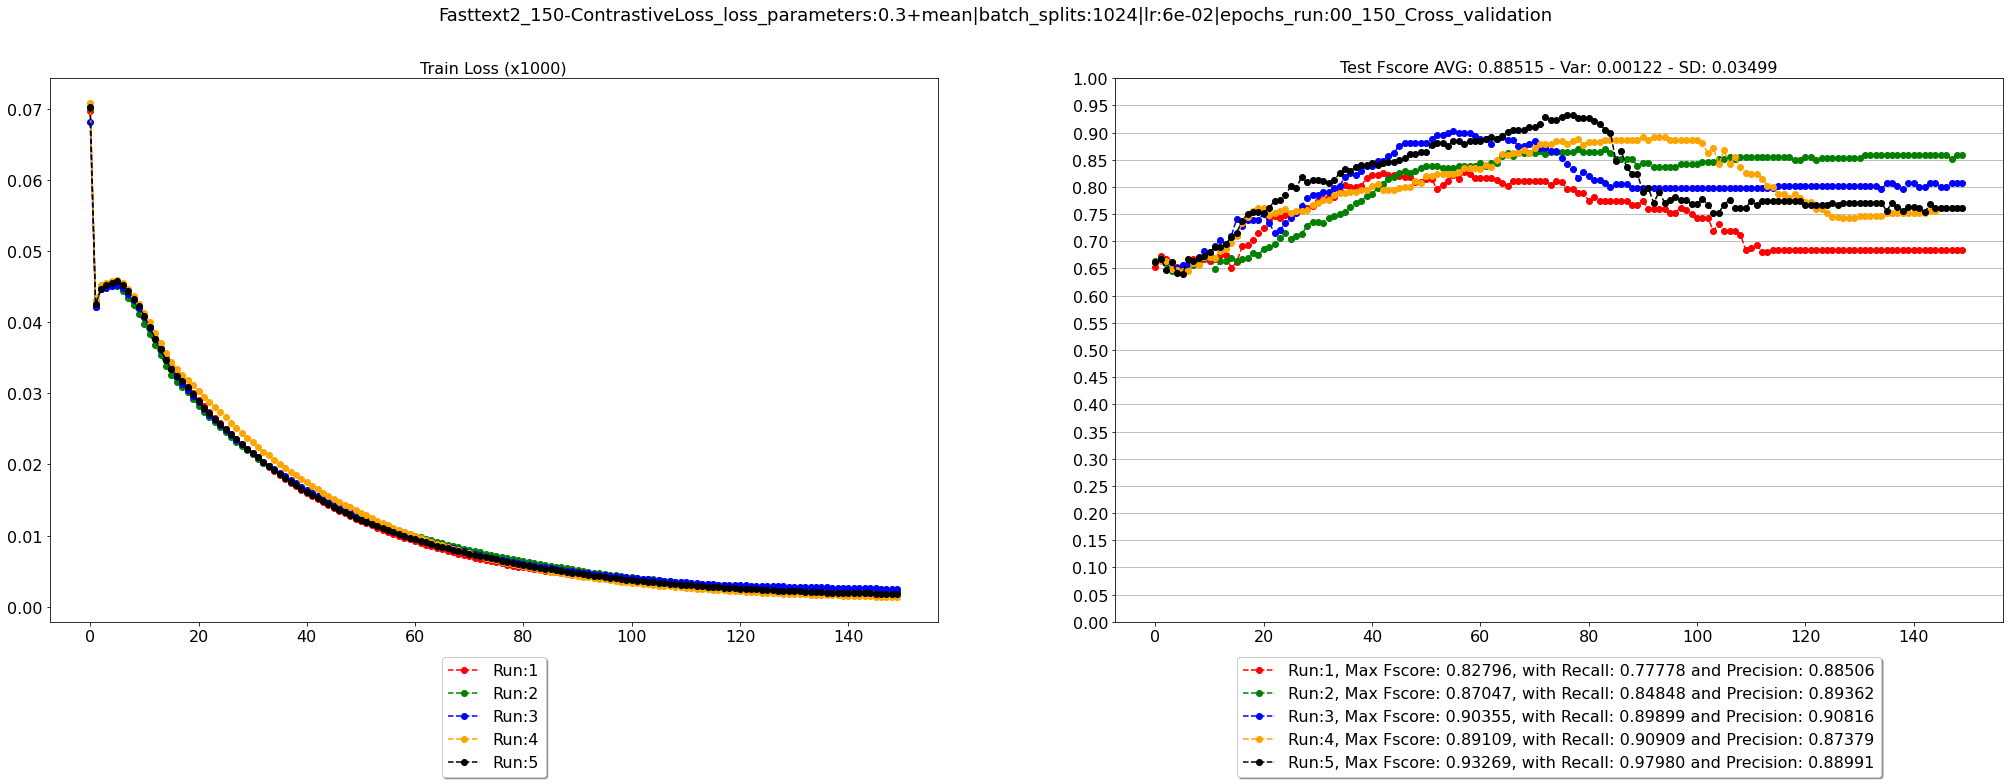

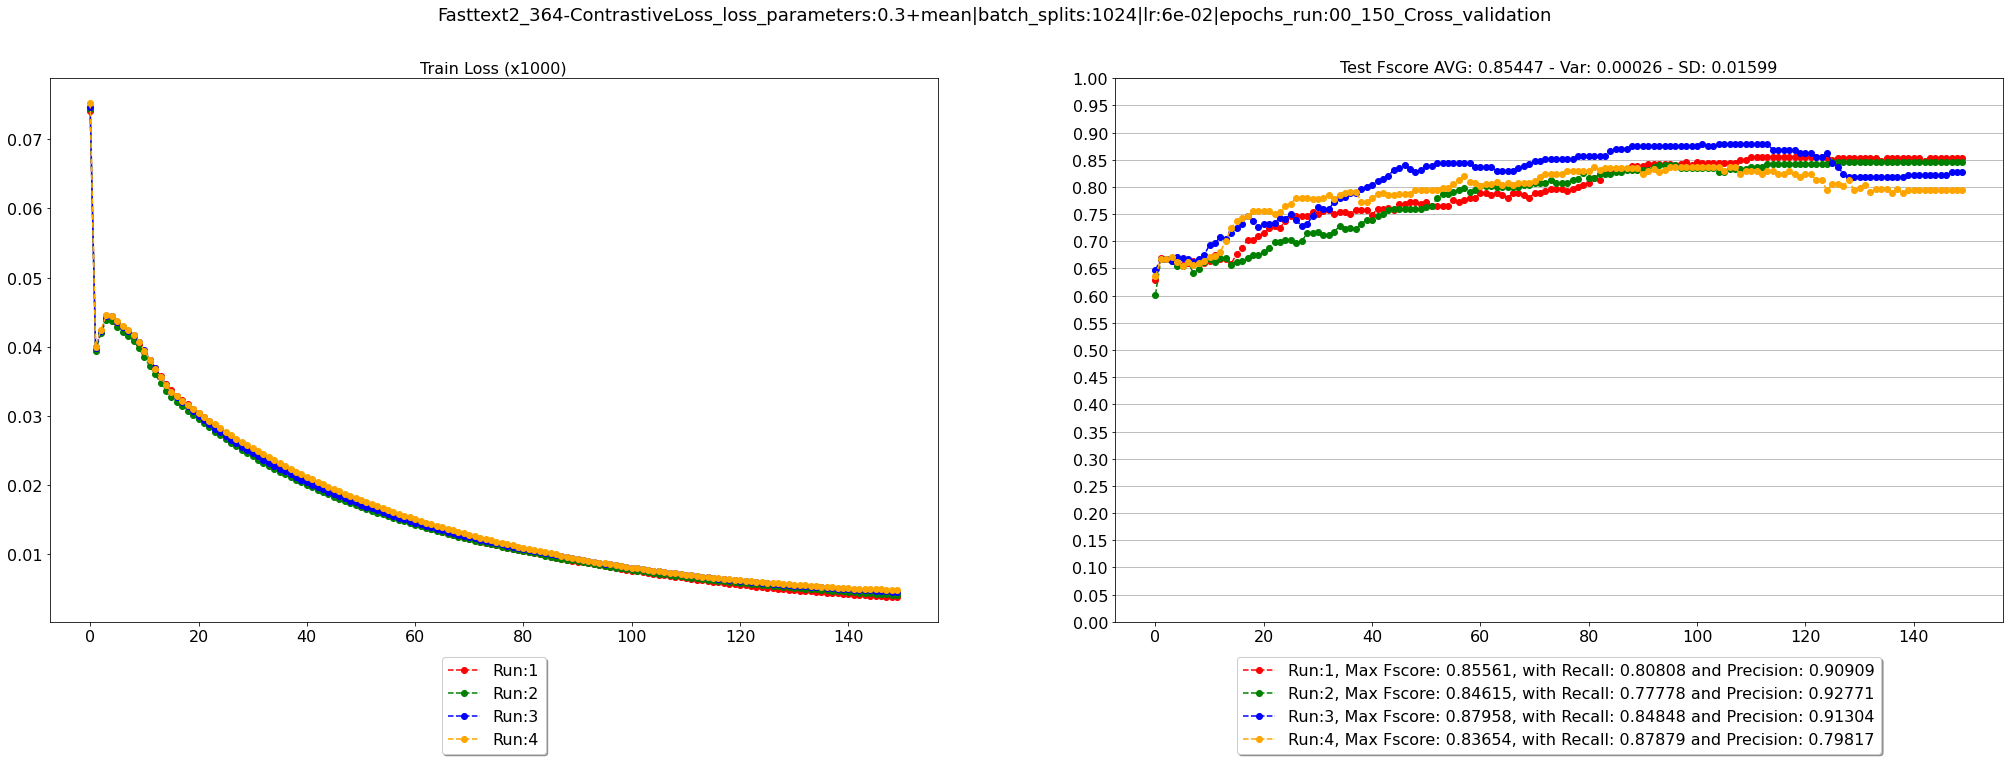

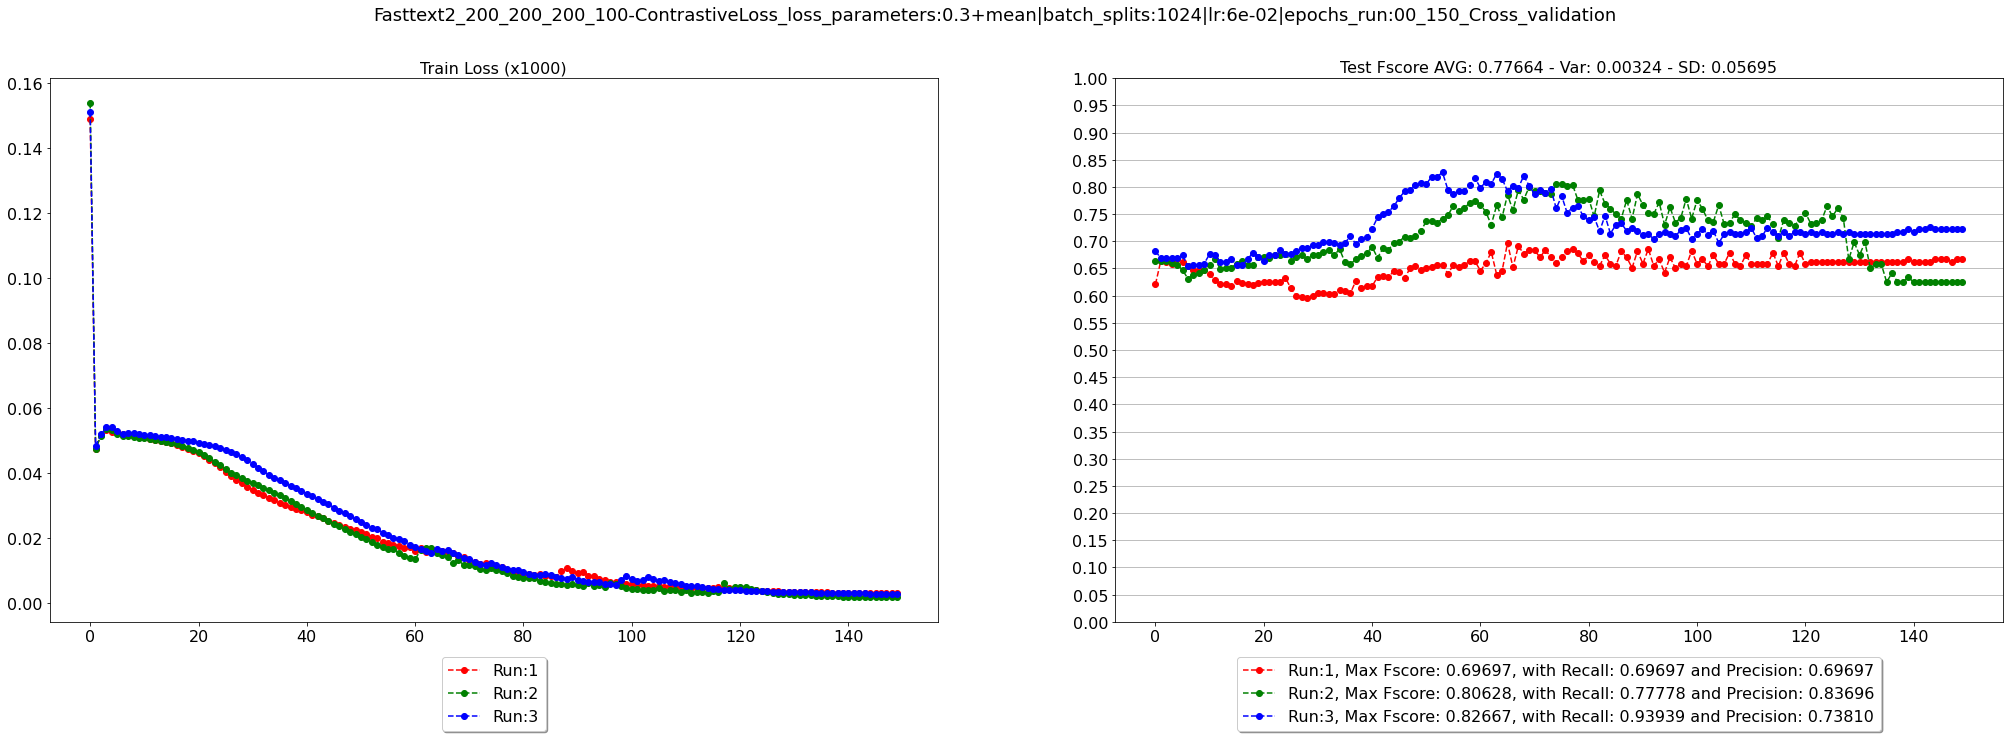

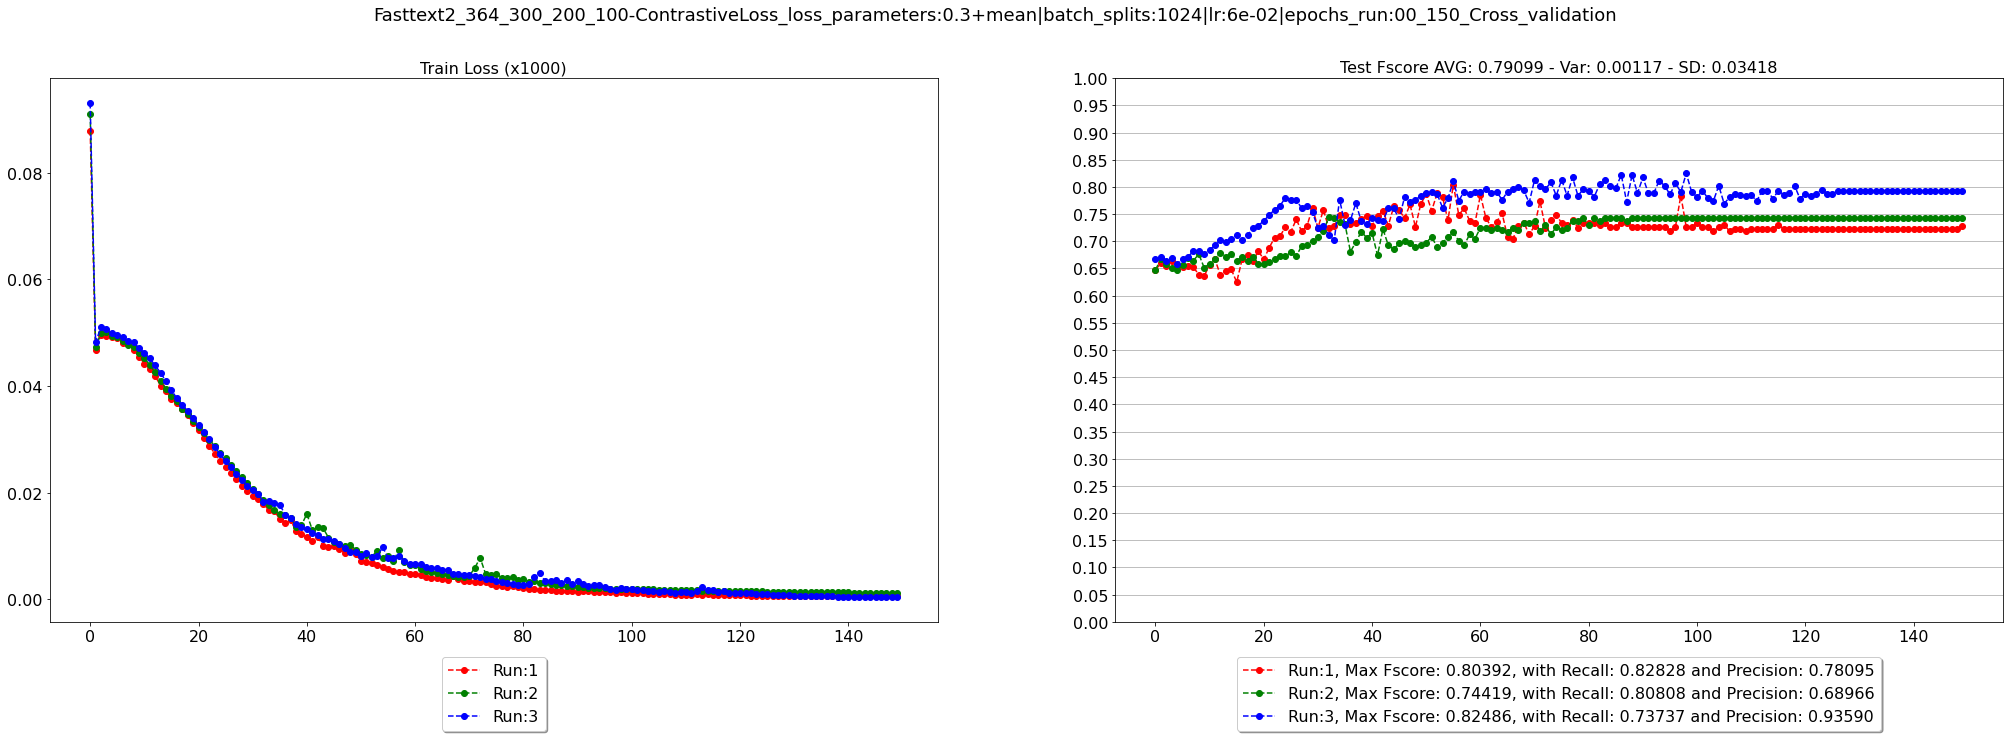

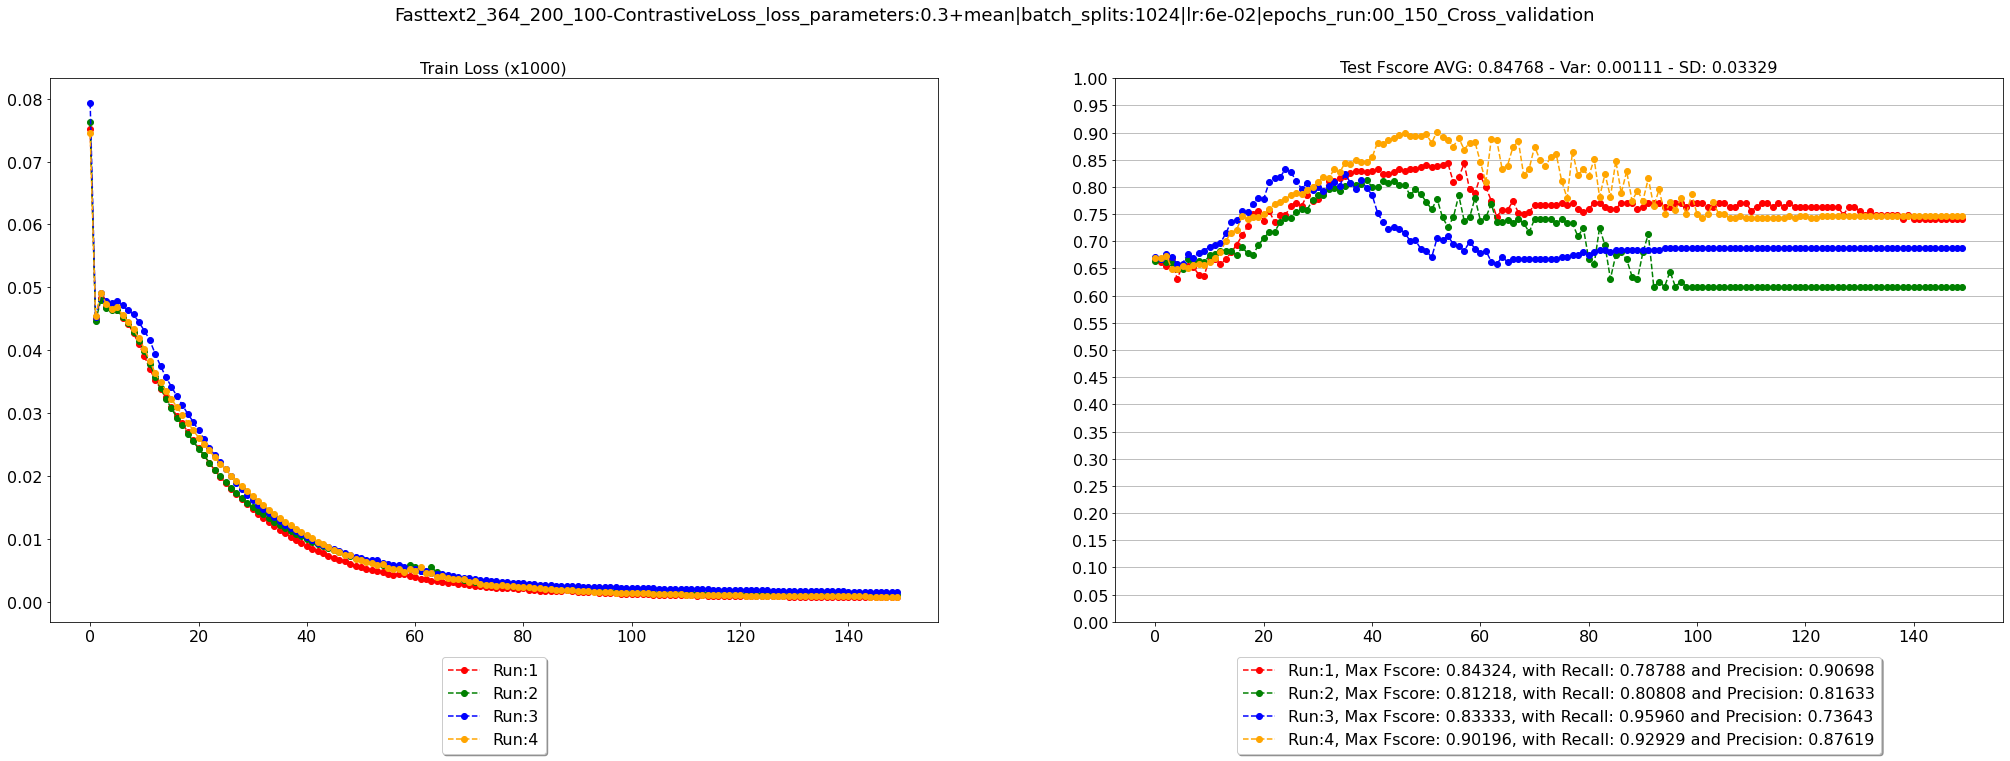

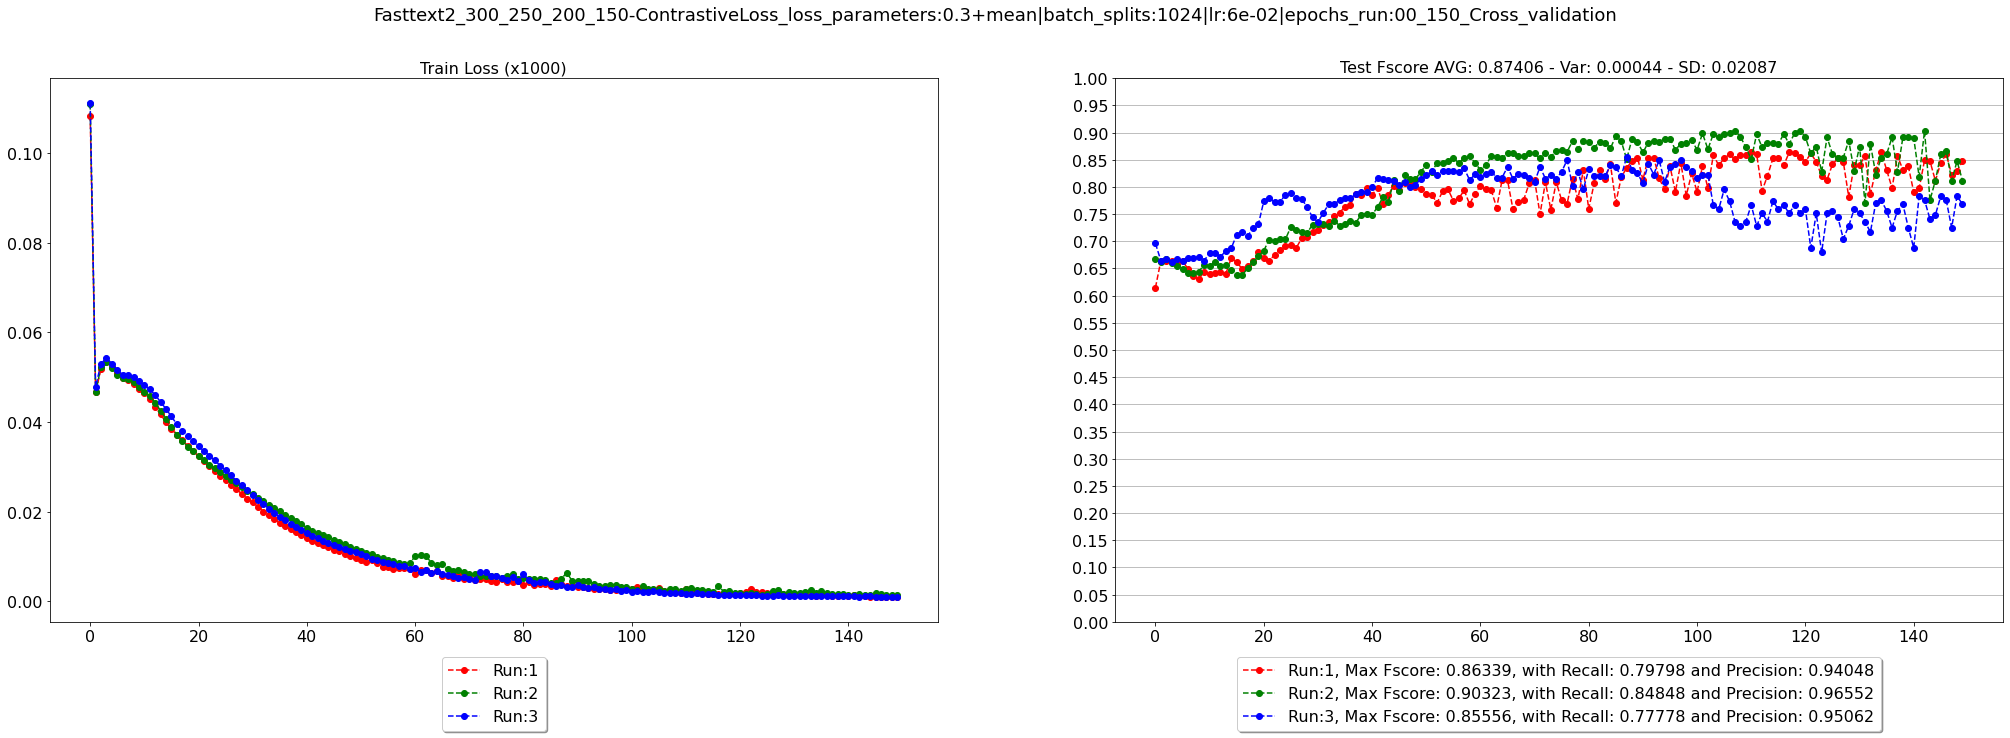

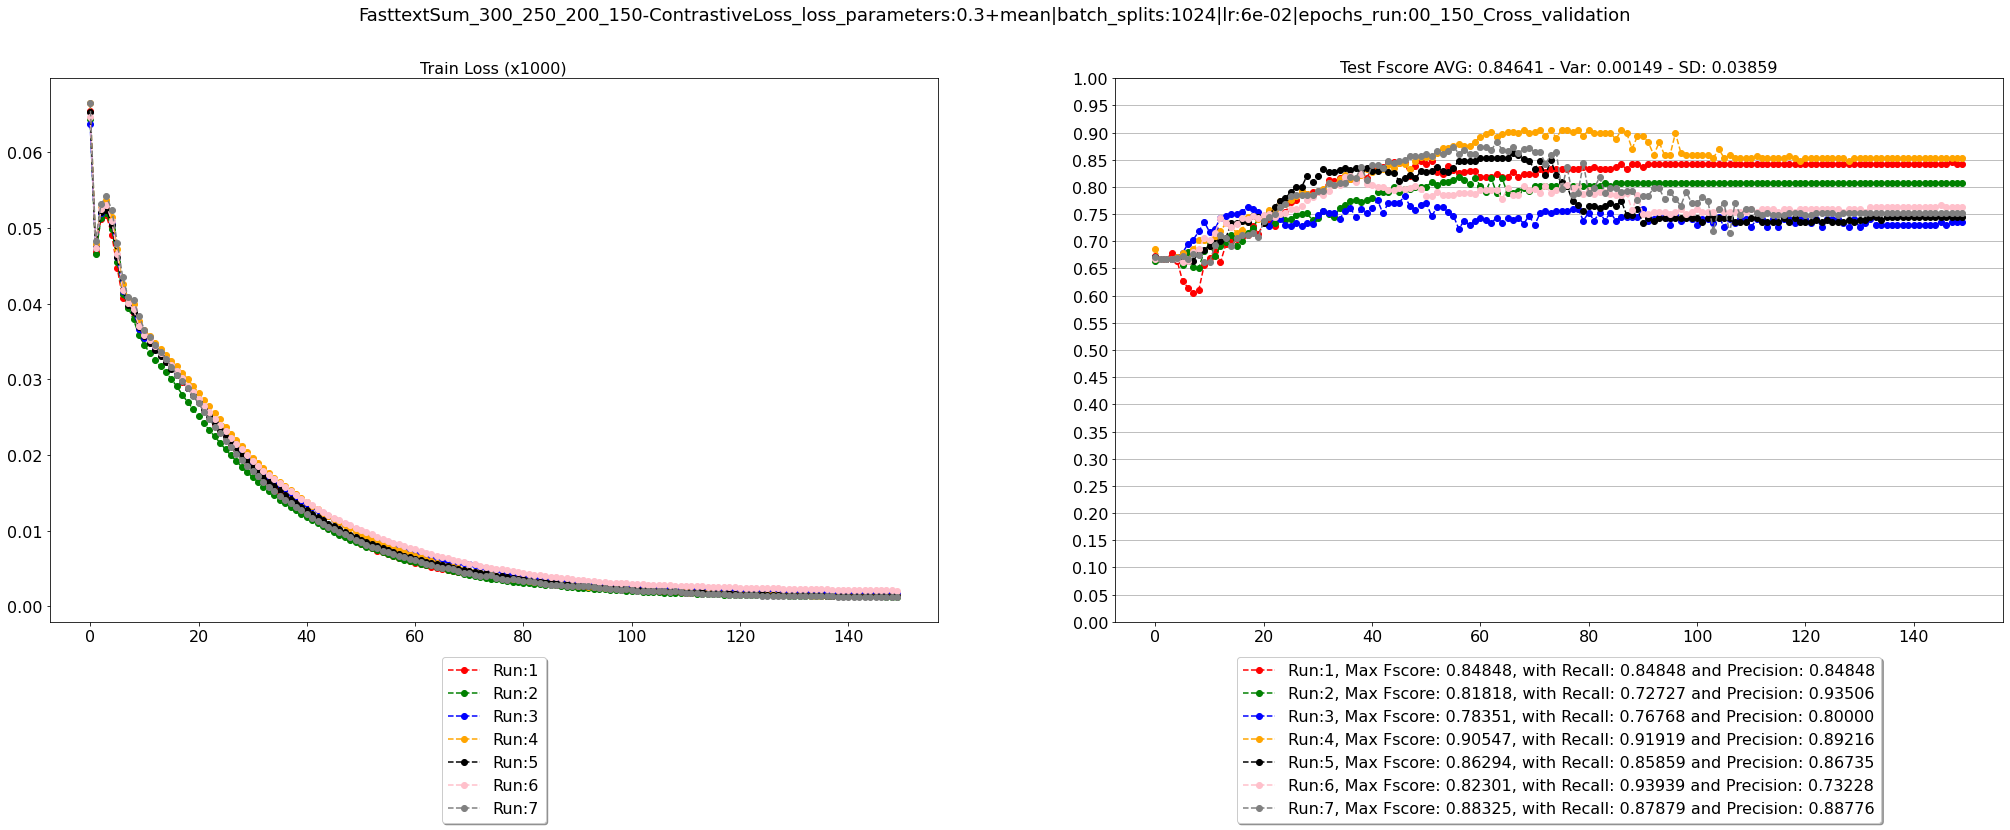

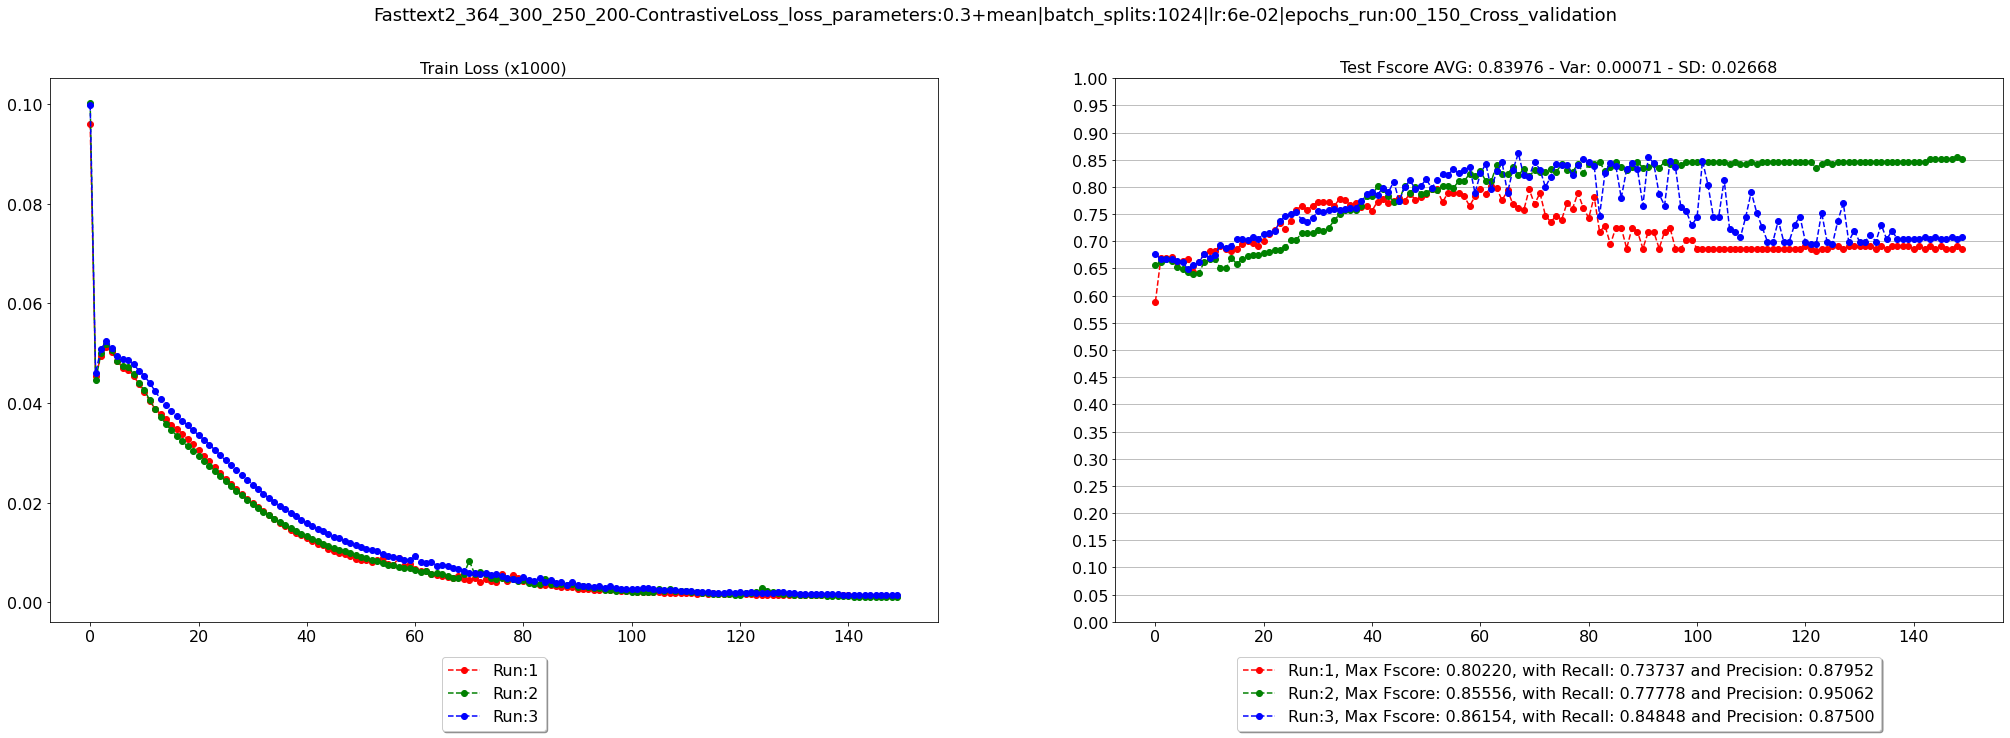

In [4]:
archi = ["Fasttext_150","Fasttext_300","Fasttext_300_250_200_150","Fasttext2_150","Fasttext2_364","FasttextSum_150","Fasttext2_200_200_200_100","Fasttext2_364_300_200_100","Fasttext2_364_200_100","FasttextSum_364_300_200_100","Fasttext2_300_250_200_150","FasttextSum_300_250_200_150","Fasttext2_364_300_250_200"]
for a in archi:
    plot.plot_cv_details(2,"openml_203ds_datasets_matching","isolation",a,"sgd","ContrastiveLoss")

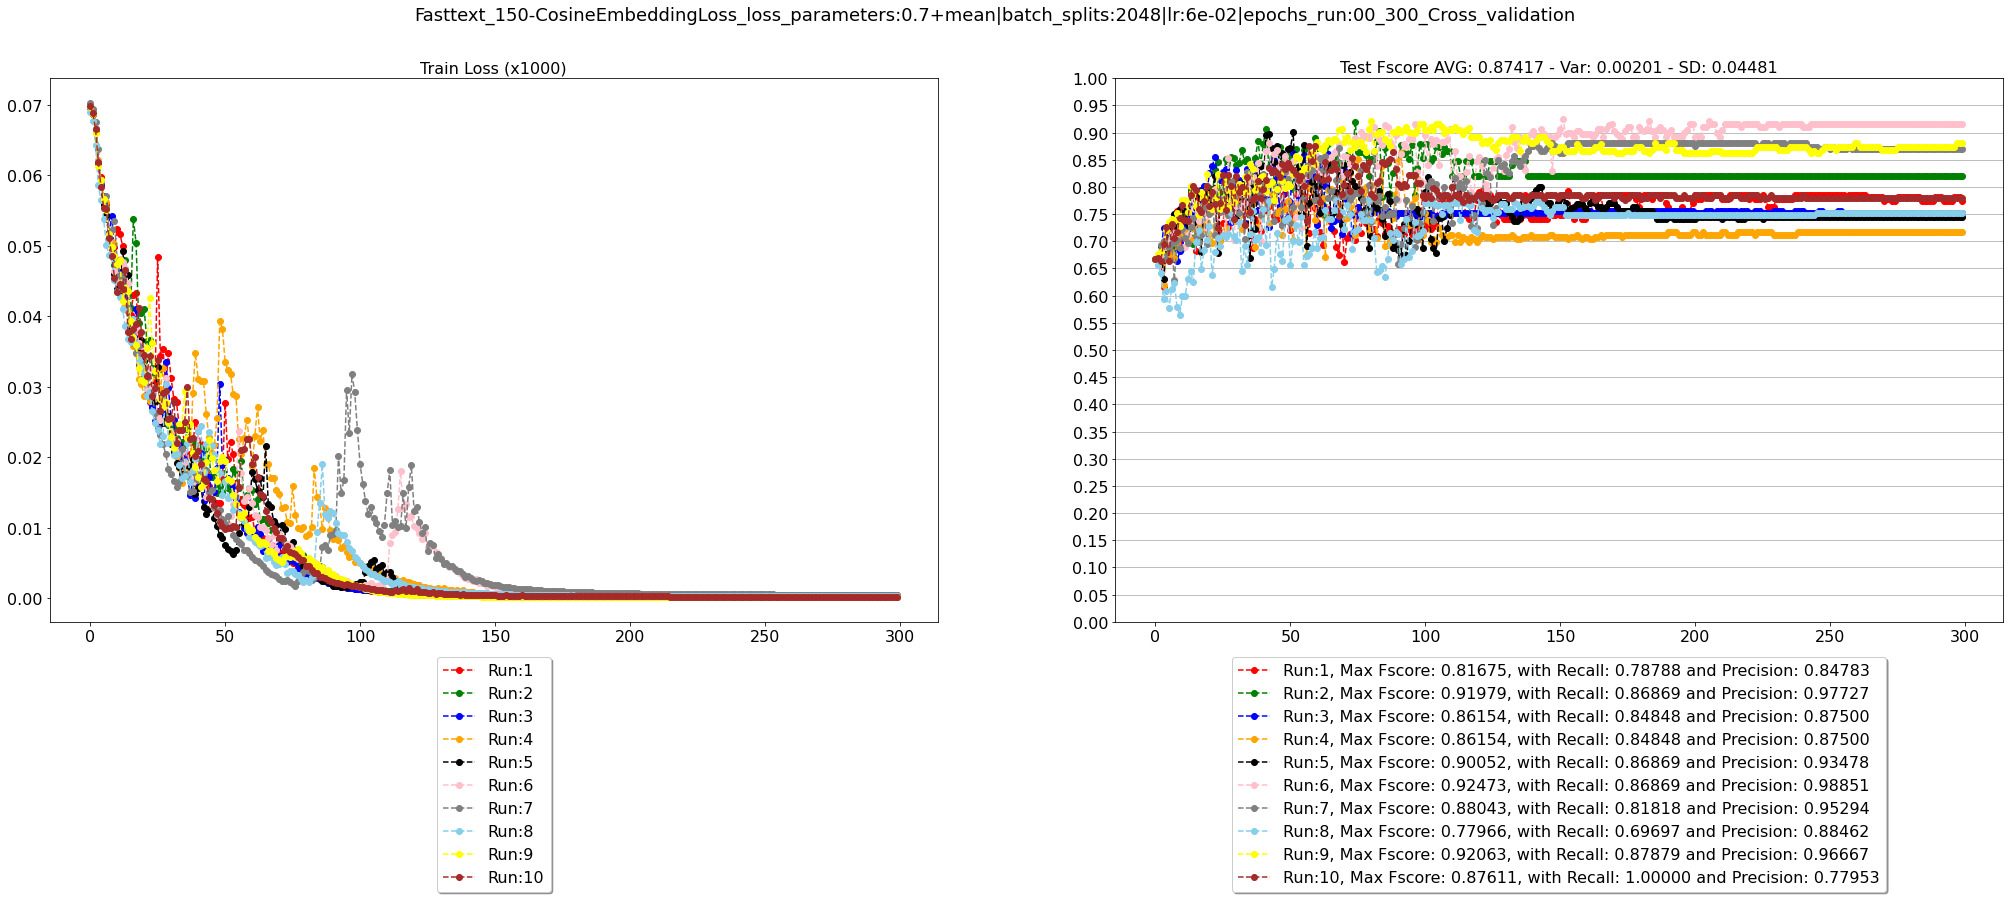

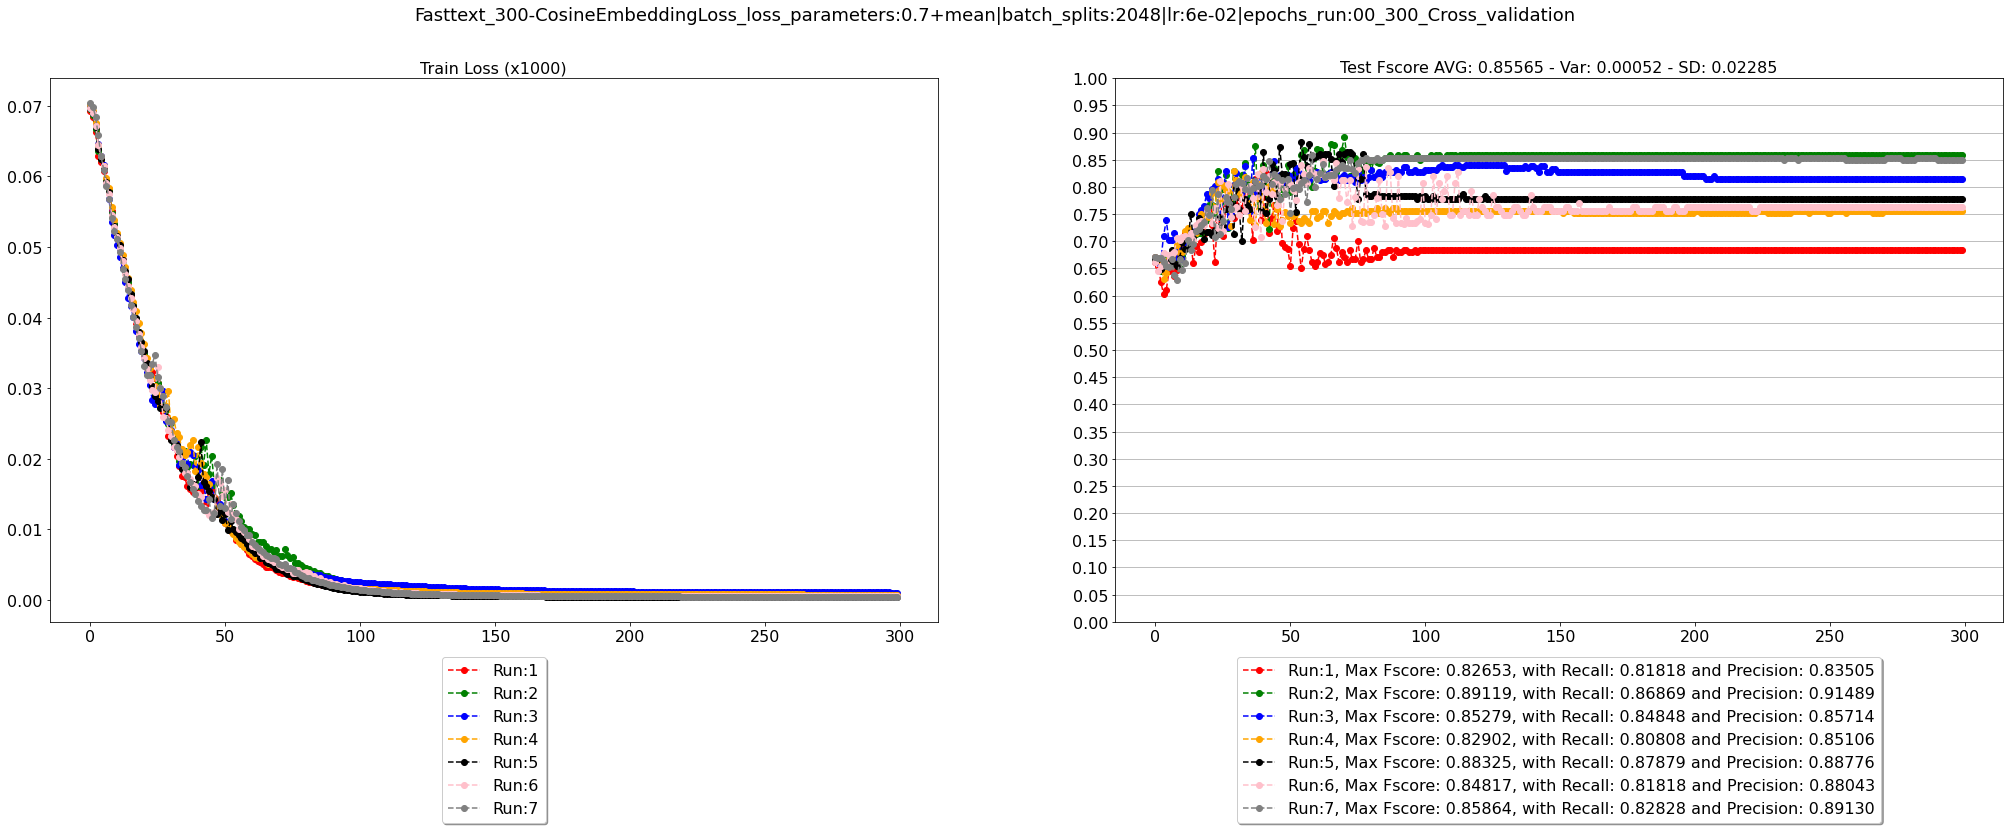

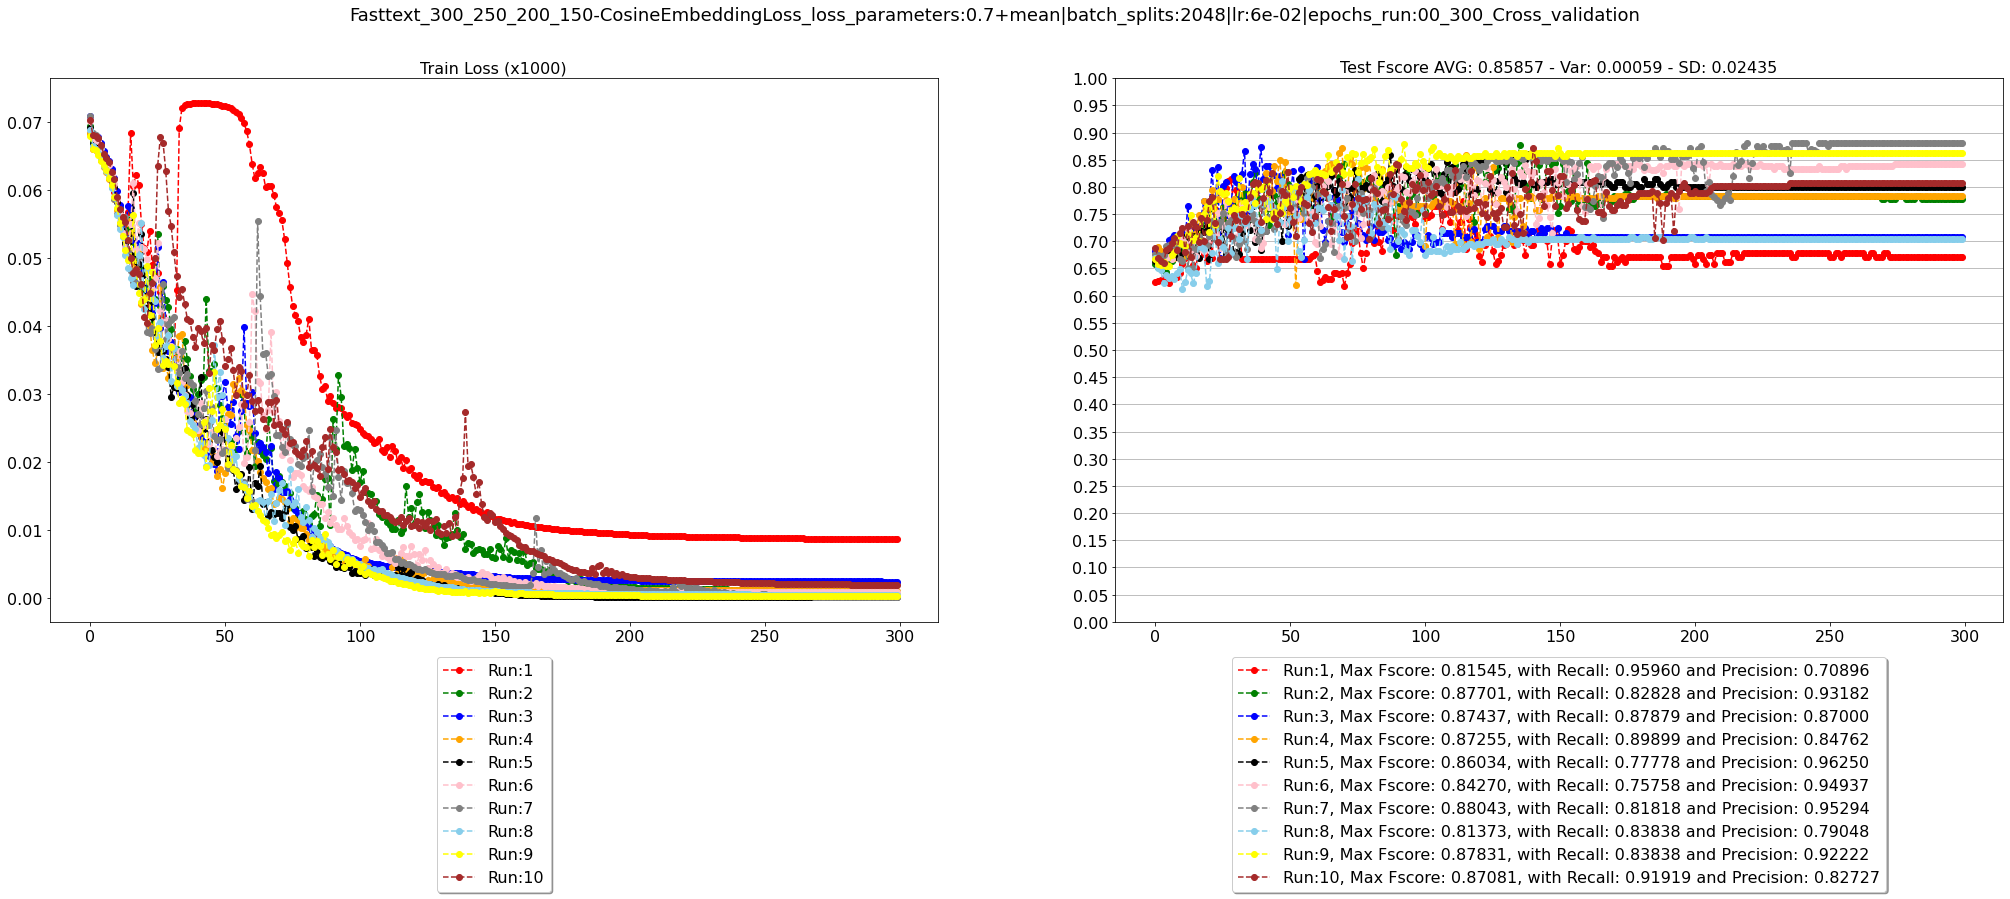

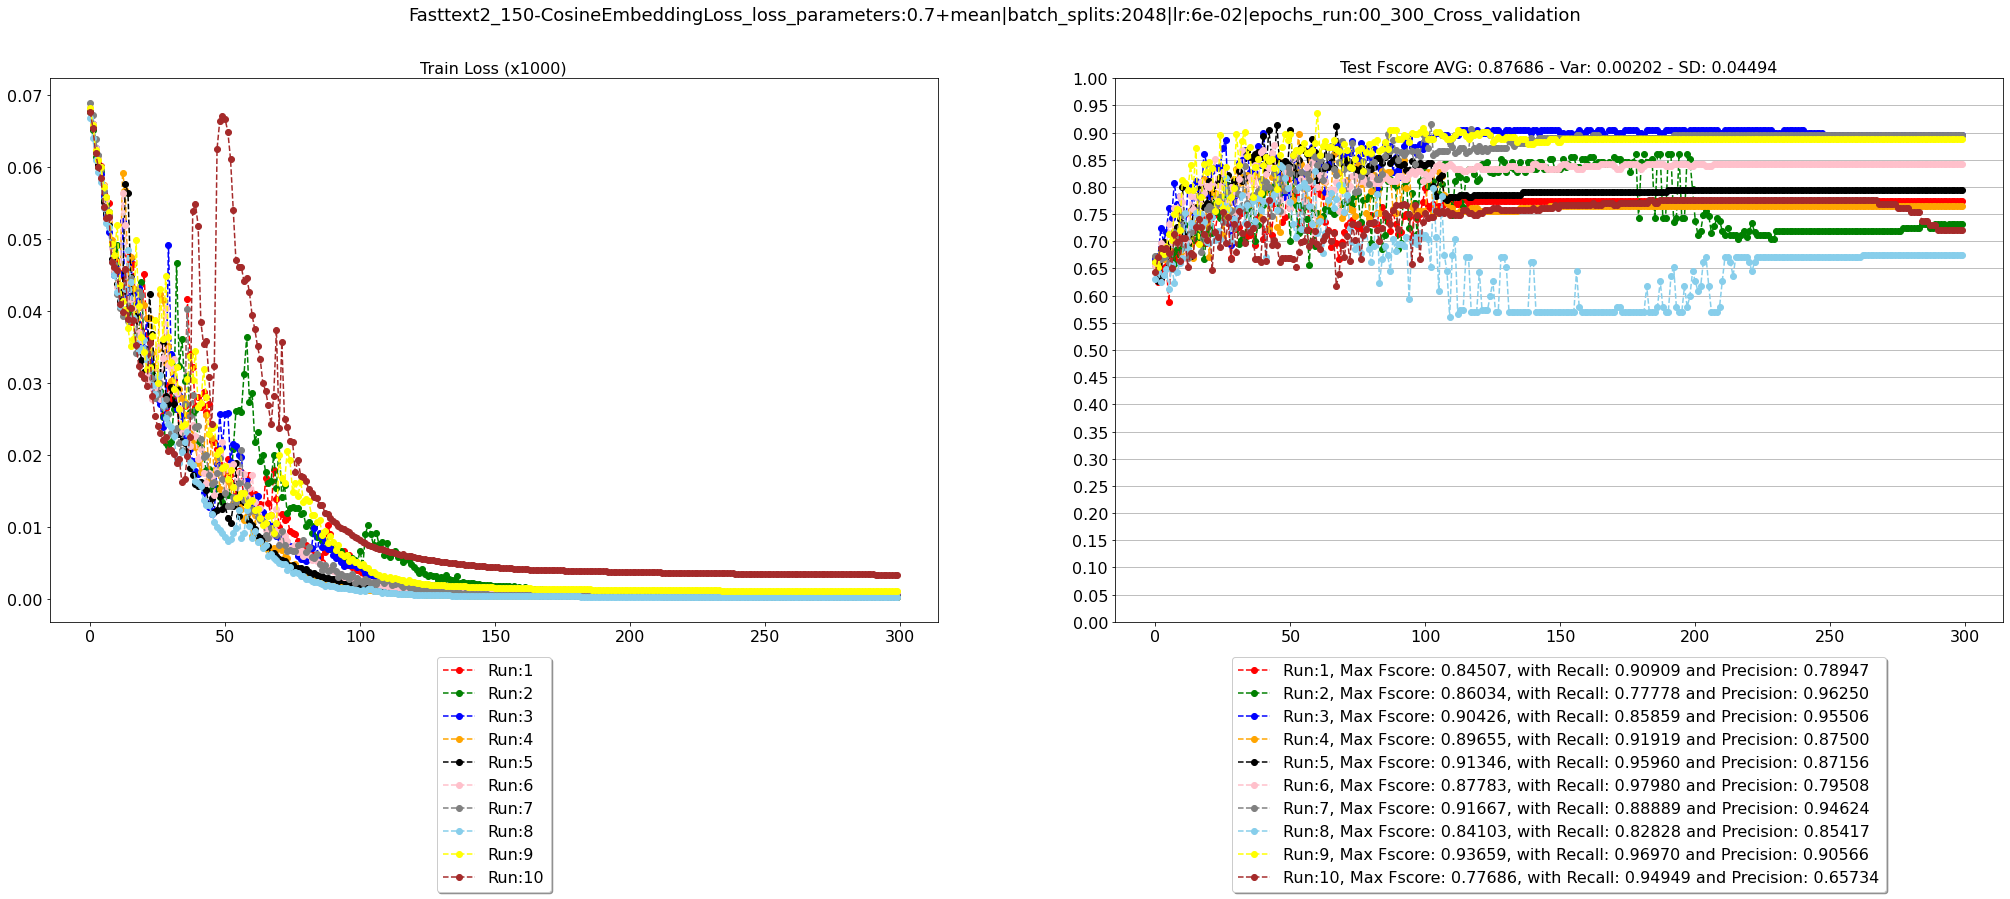

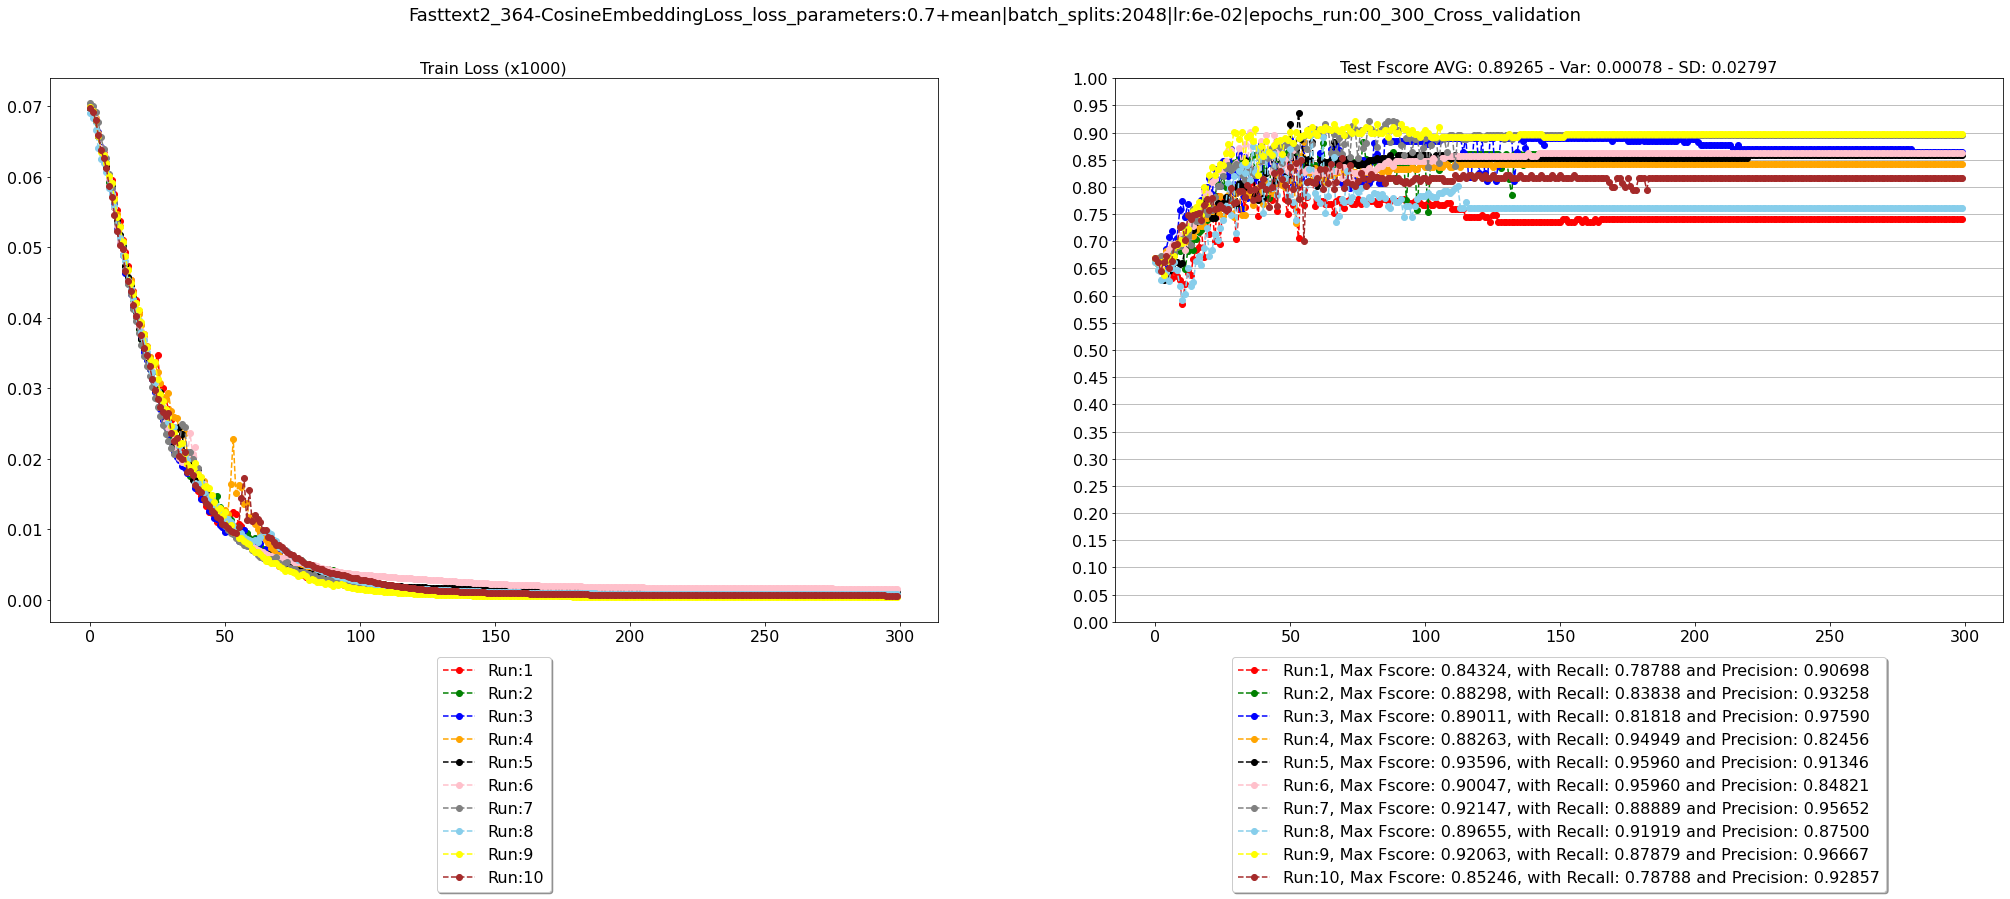

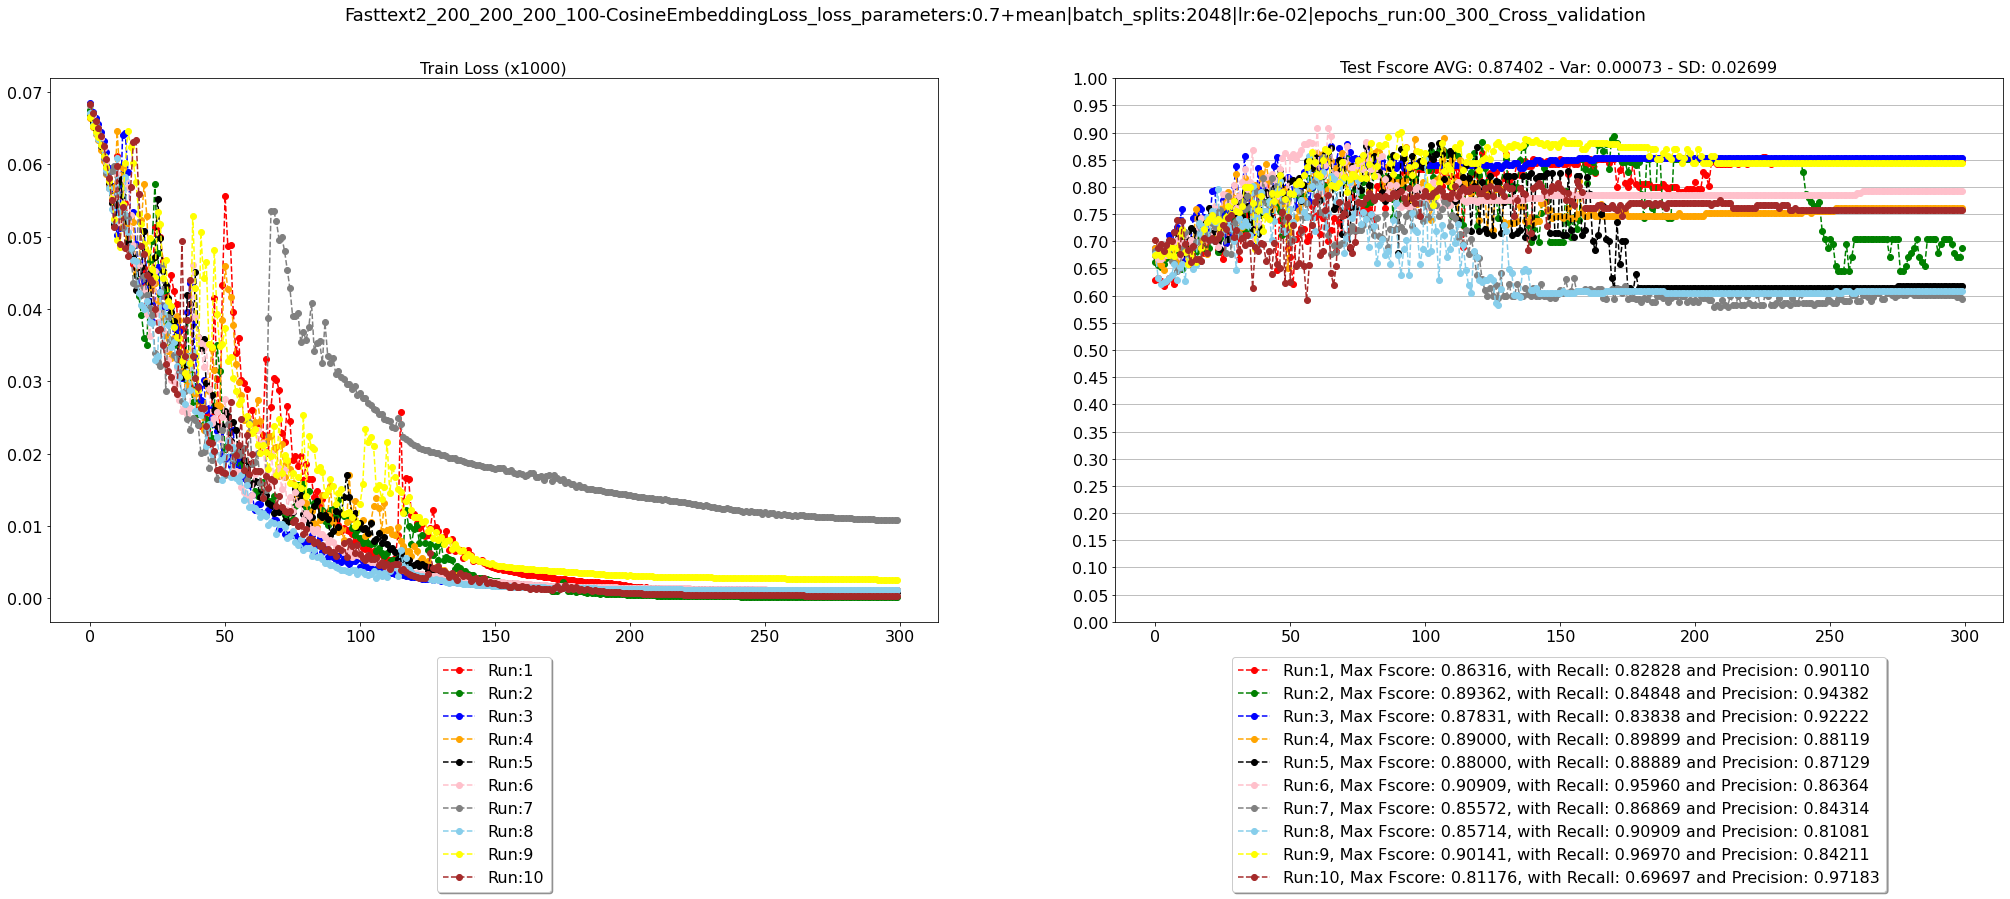

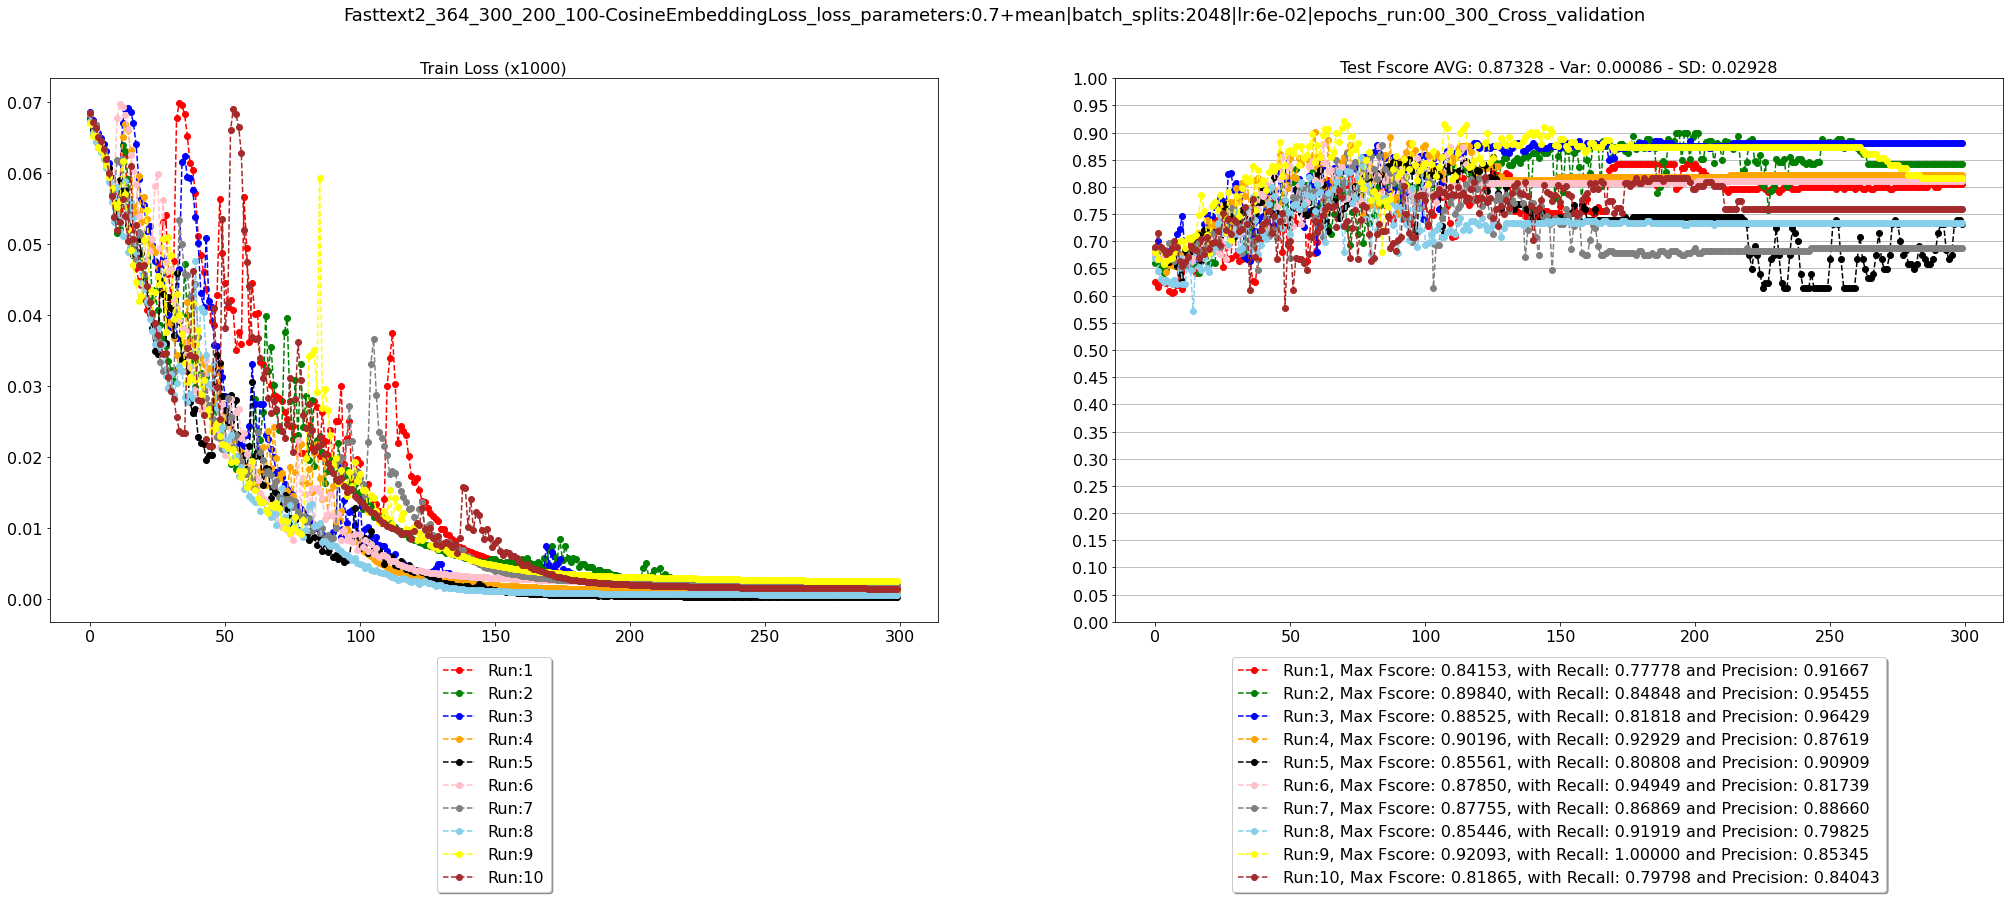

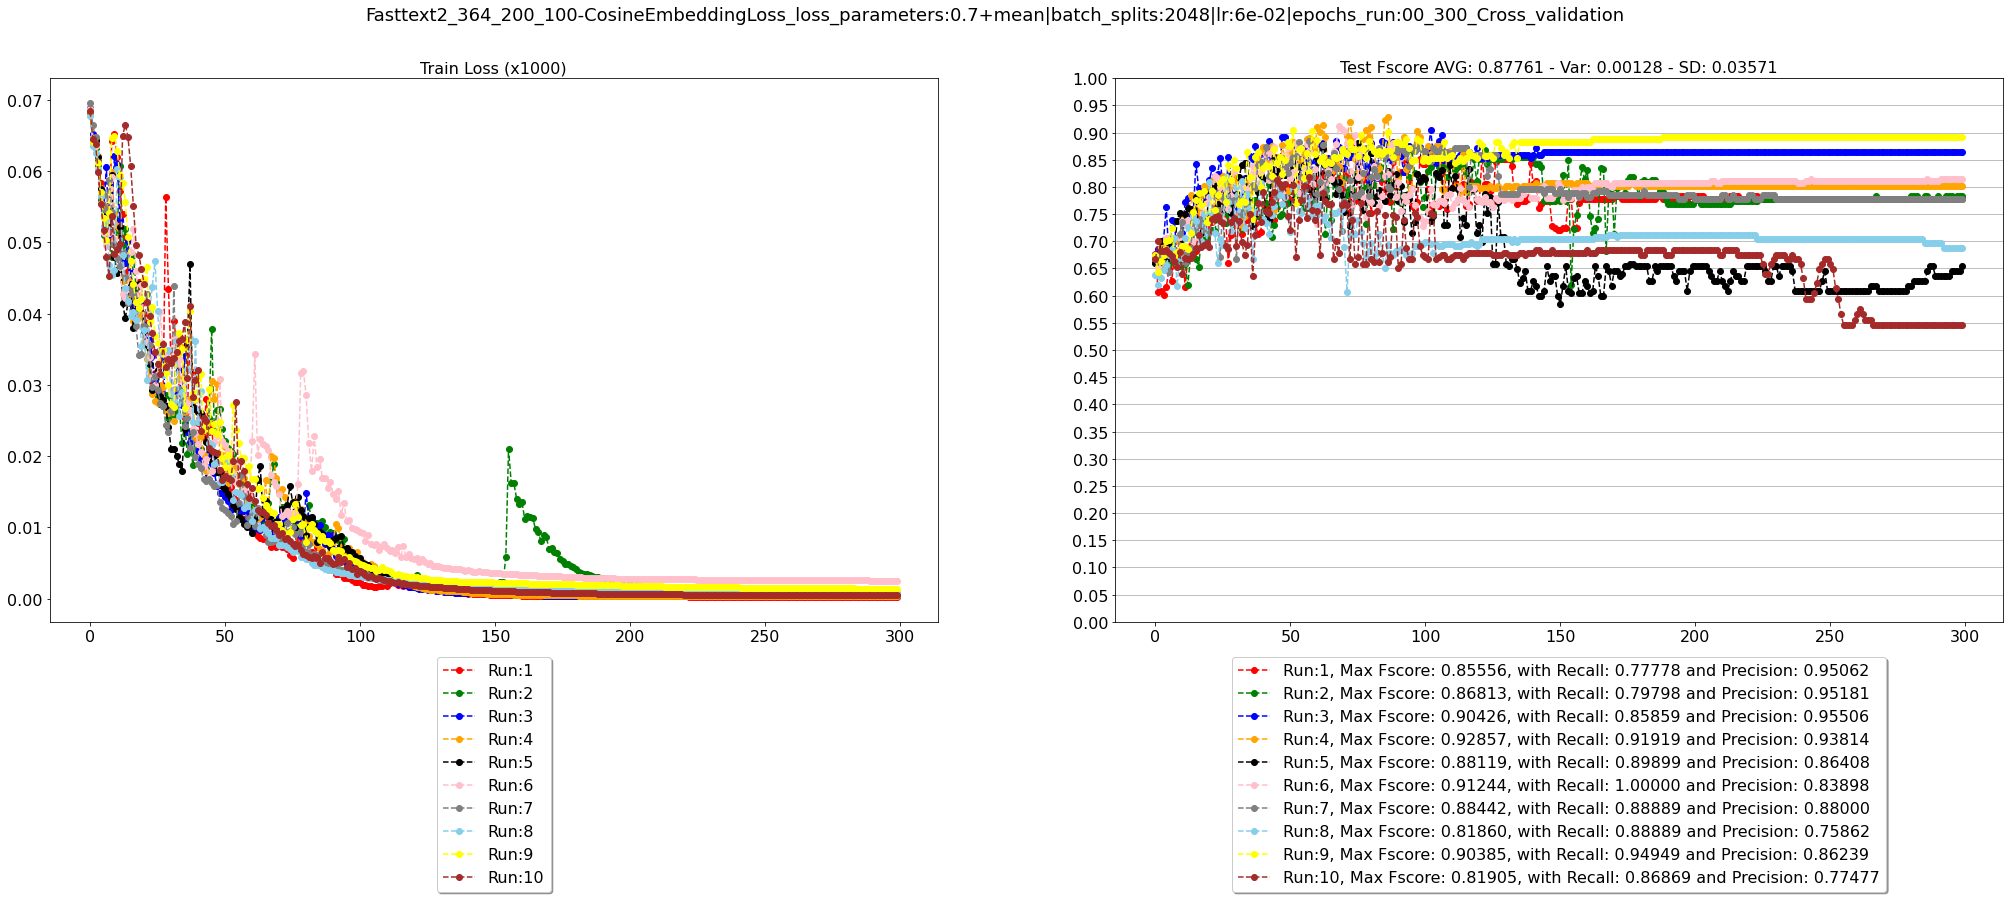

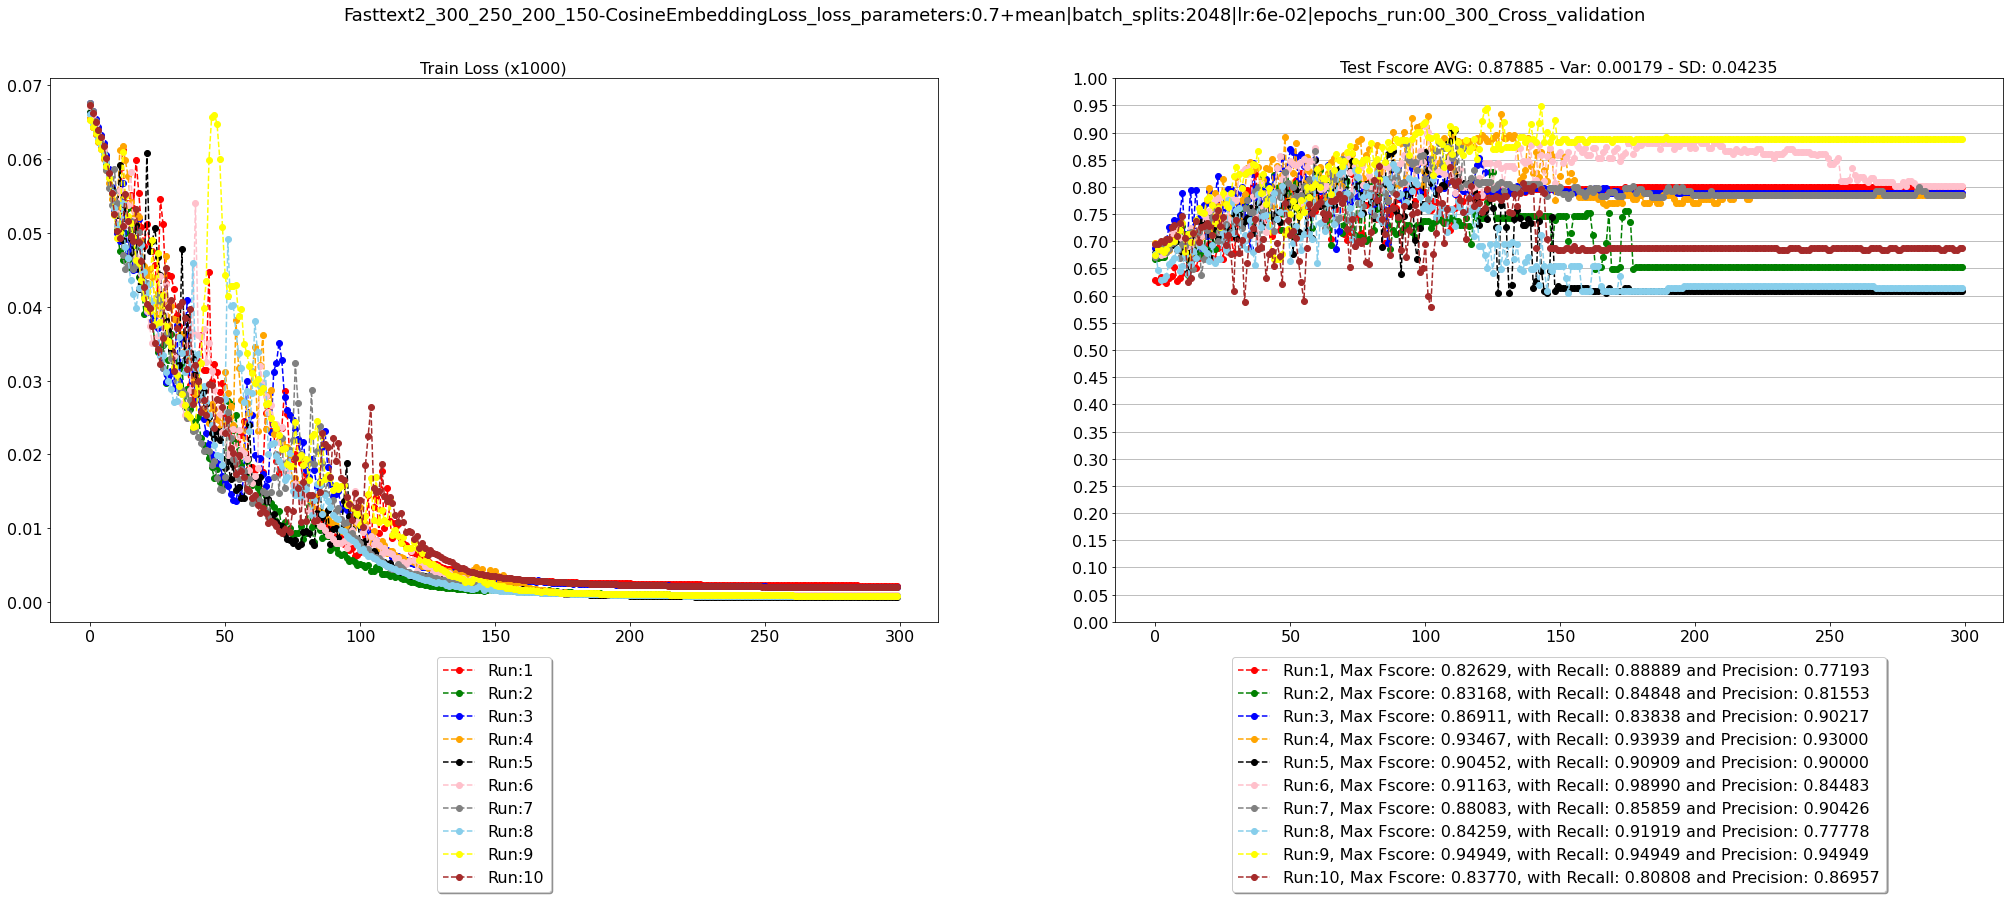

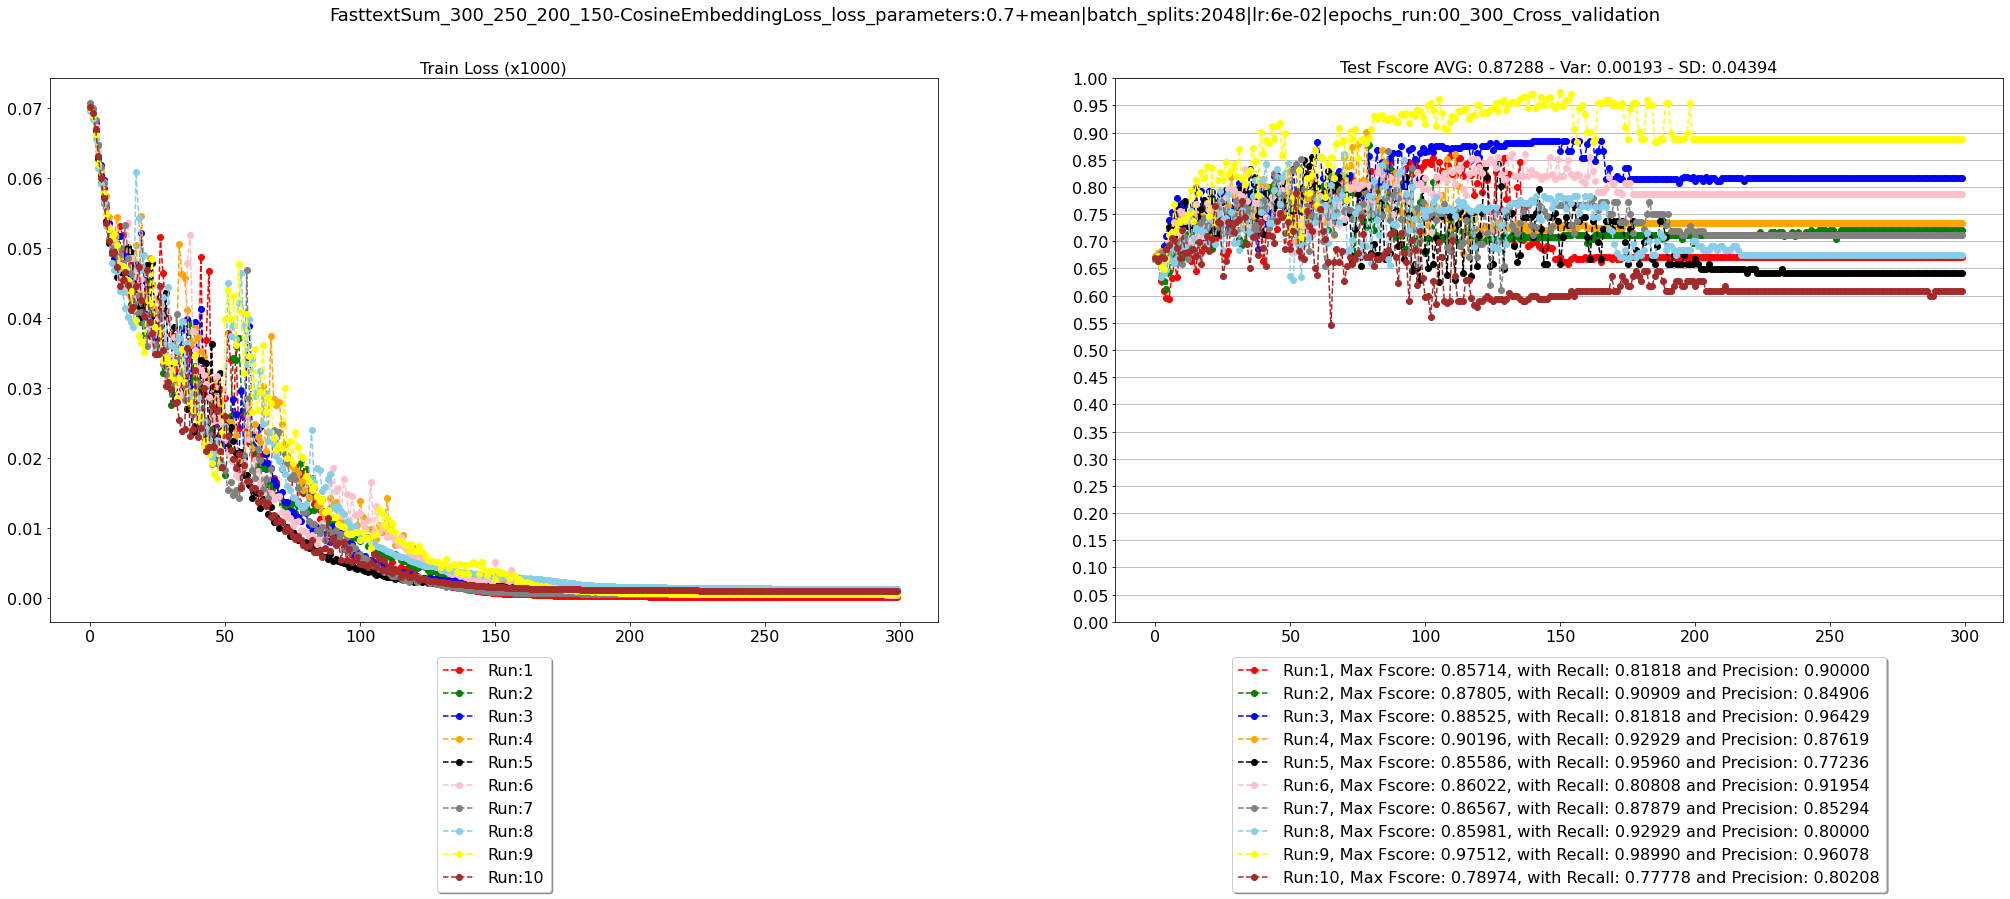

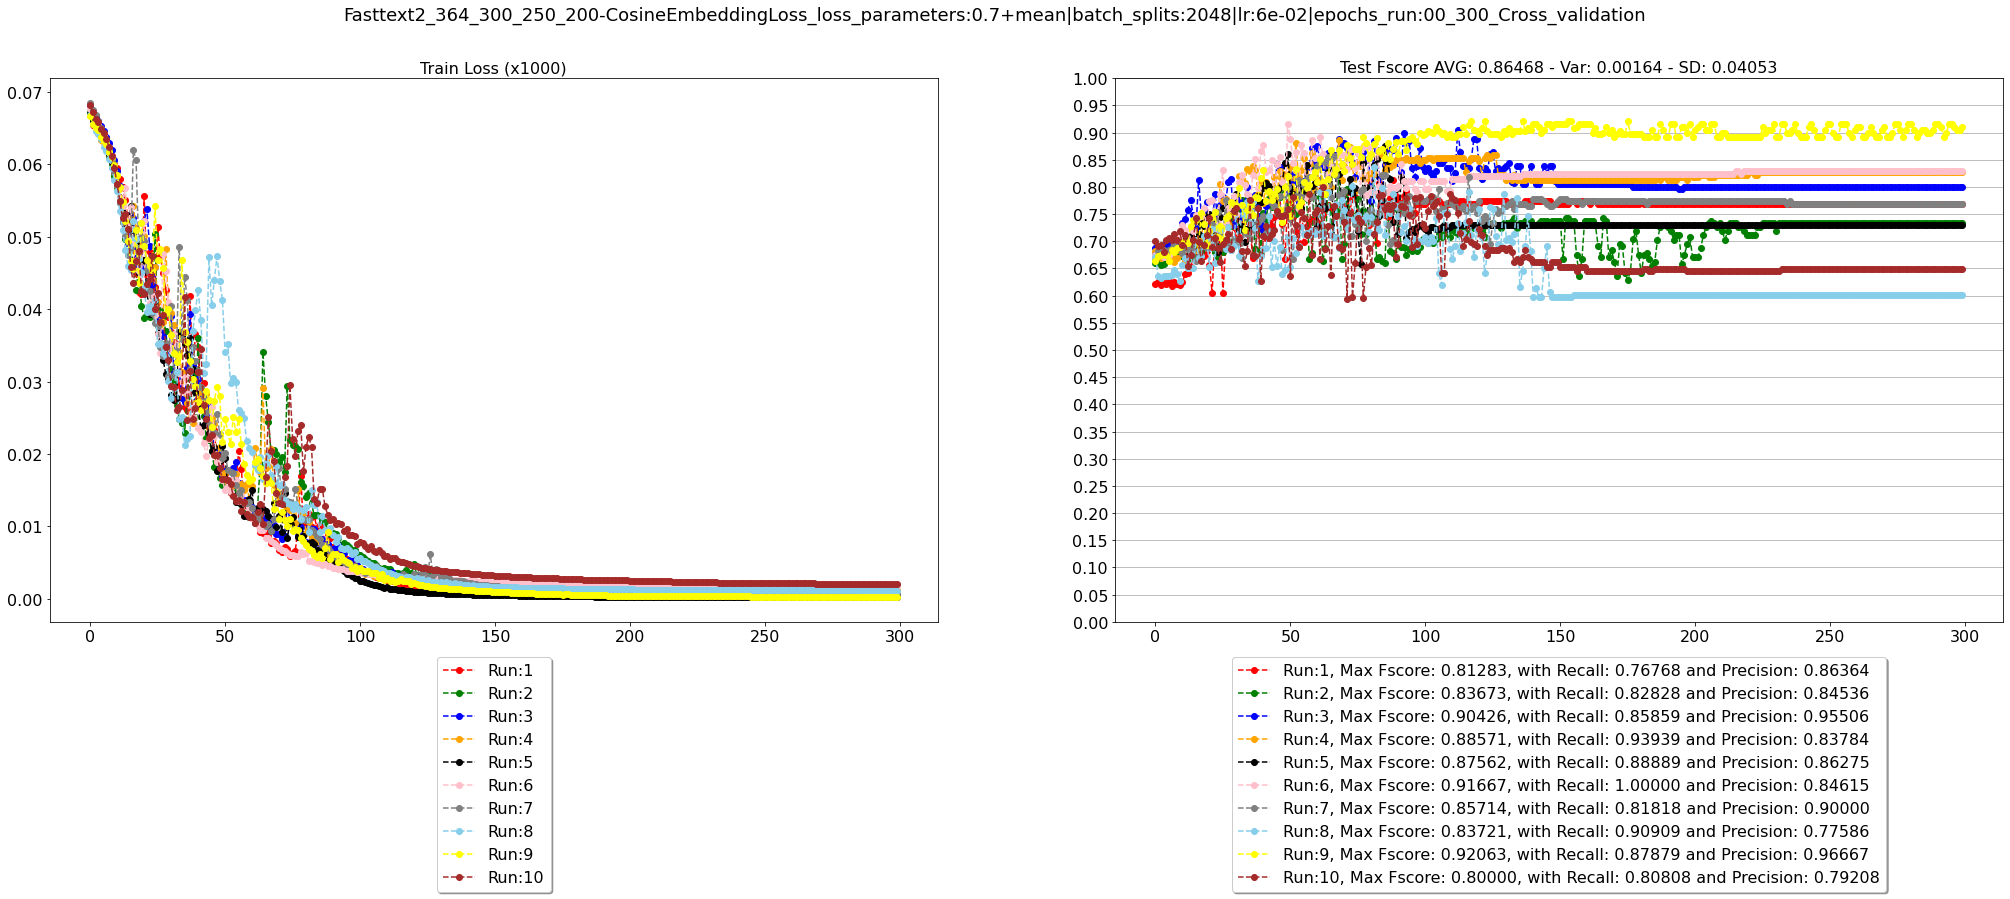

In [3]:
archi = ["Fasttext_150","Fasttext_300","Fasttext_300_250_200_150","Fasttext2_150","Fasttext2_364","FasttextSum_150","Fasttext2_200_200_200_100","Fasttext2_364_300_200_100","Fasttext2_364_200_100","FasttextSum_364_300_200_100","Fasttext2_300_250_200_150","FasttextSum_300_250_200_150","Fasttext2_364_300_250_200"]
for a in archi:
    plot.plot_cv_details(2,"openml_203ds_datasets_matching","isolation",a,"sgd","CosineEmbeddingLoss")

## CV 4

In [ ]:
archi = ["Fasttext_150","Fasttext_300","Fasttext_300_250_200_150","Fasttext2_150","Fasttext2_364","FasttextSum_150","Fasttext2_200_200_200_100","Fasttext2_364_300_200_100","Fasttext2_364_200_100","FasttextSum_364_300_200_100","Fasttext2_300_250_200_150","FasttextSum_300_250_200_150","Fasttext2_364_300_250_200"]
for a in archi:
    plot.plot_cv_details(4,"openml_203ds_datasets_matching","isolation",a,"sgd","ContrastiveLoss")

In [ ]:
archi = ["Fasttext_150","Fasttext_300","Fasttext_300_250_200_150","Fasttext2_150","Fasttext2_364","FasttextSum_150","Fasttext2_200_200_200_100","Fasttext2_364_300_200_100","Fasttext2_364_200_100","FasttextSum_364_300_200_100","Fasttext2_300_250_200_150","FasttextSum_300_250_200_150","Fasttext2_364_300_250_200"]
for a in archi:
    plot.plot_cv_details(4,"openml_203ds_datasets_matching","isolation",a,"sgd","CosineEmbeddingLoss")

## CV 8

In [ ]:
archi = ["Fasttext_150","Fasttext_300","Fasttext_300_250_200_150","Fasttext2_150","Fasttext2_364","FasttextSum_150","Fasttext2_200_200_200_100","Fasttext2_364_300_200_100","Fasttext2_364_200_100","FasttextSum_364_300_200_100","Fasttext2_300_250_200_150","FasttextSum_300_250_200_150","Fasttext2_364_300_250_200"]
for a in archi:
    plot.plot_cv_details(8,"openml_203ds_datasets_matching","isolation",a,"sgd","ContrastiveLoss")

In [ ]:
archi = ["Fasttext_150","Fasttext_300","Fasttext_300_250_200_150","Fasttext2_150","Fasttext2_364","FasttextSum_150","Fasttext2_200_200_200_100","Fasttext2_364_300_200_100","Fasttext2_364_200_100","FasttextSum_364_300_200_100","Fasttext2_300_250_200_150","FasttextSum_300_250_200_150","Fasttext2_364_300_250_200"]
for a in archi:
    plot.plot_cv_details(8,"openml_203ds_datasets_matching","isolation",a,"sgd","CosineEmbeddingLoss")

## CV 16

## CV 24

# Random

## CV1

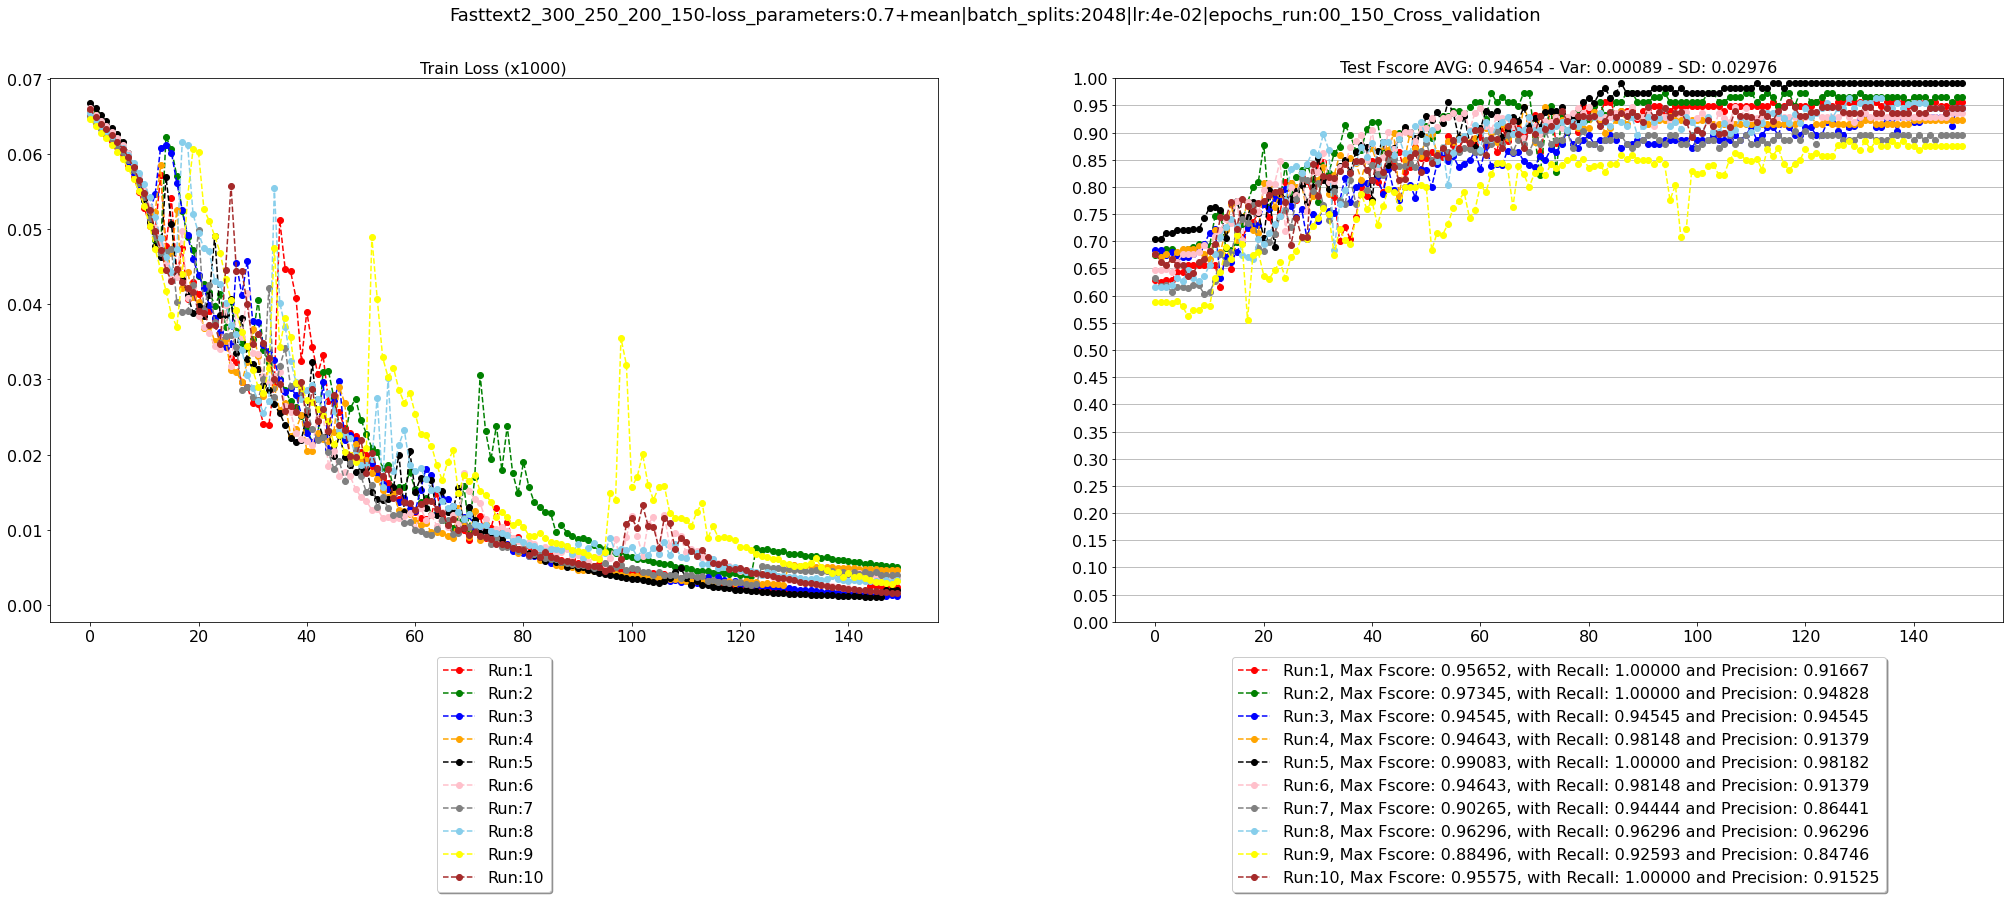

In [20]:
plot.plot_cv_details(1,"openml_203ds_datasets_matching","random","Fasttext2_300_250_200_150","sgd","CosineEmbeddingLoss")

## CV 2

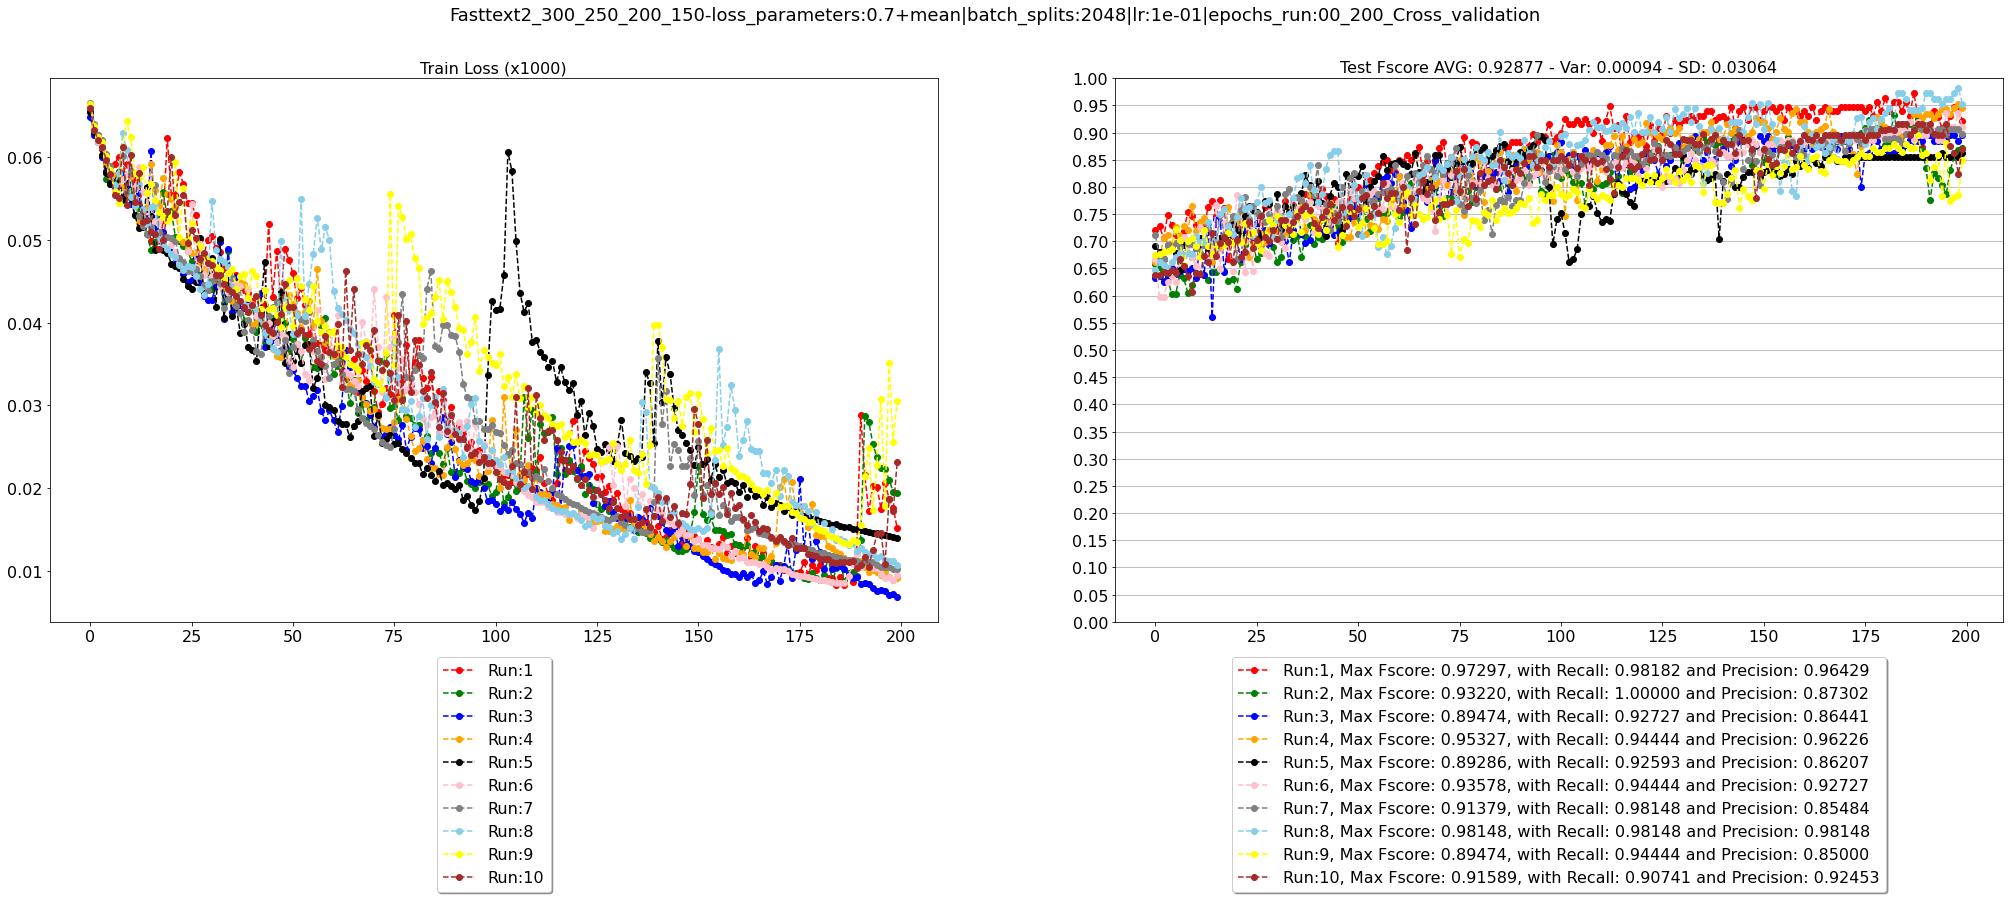

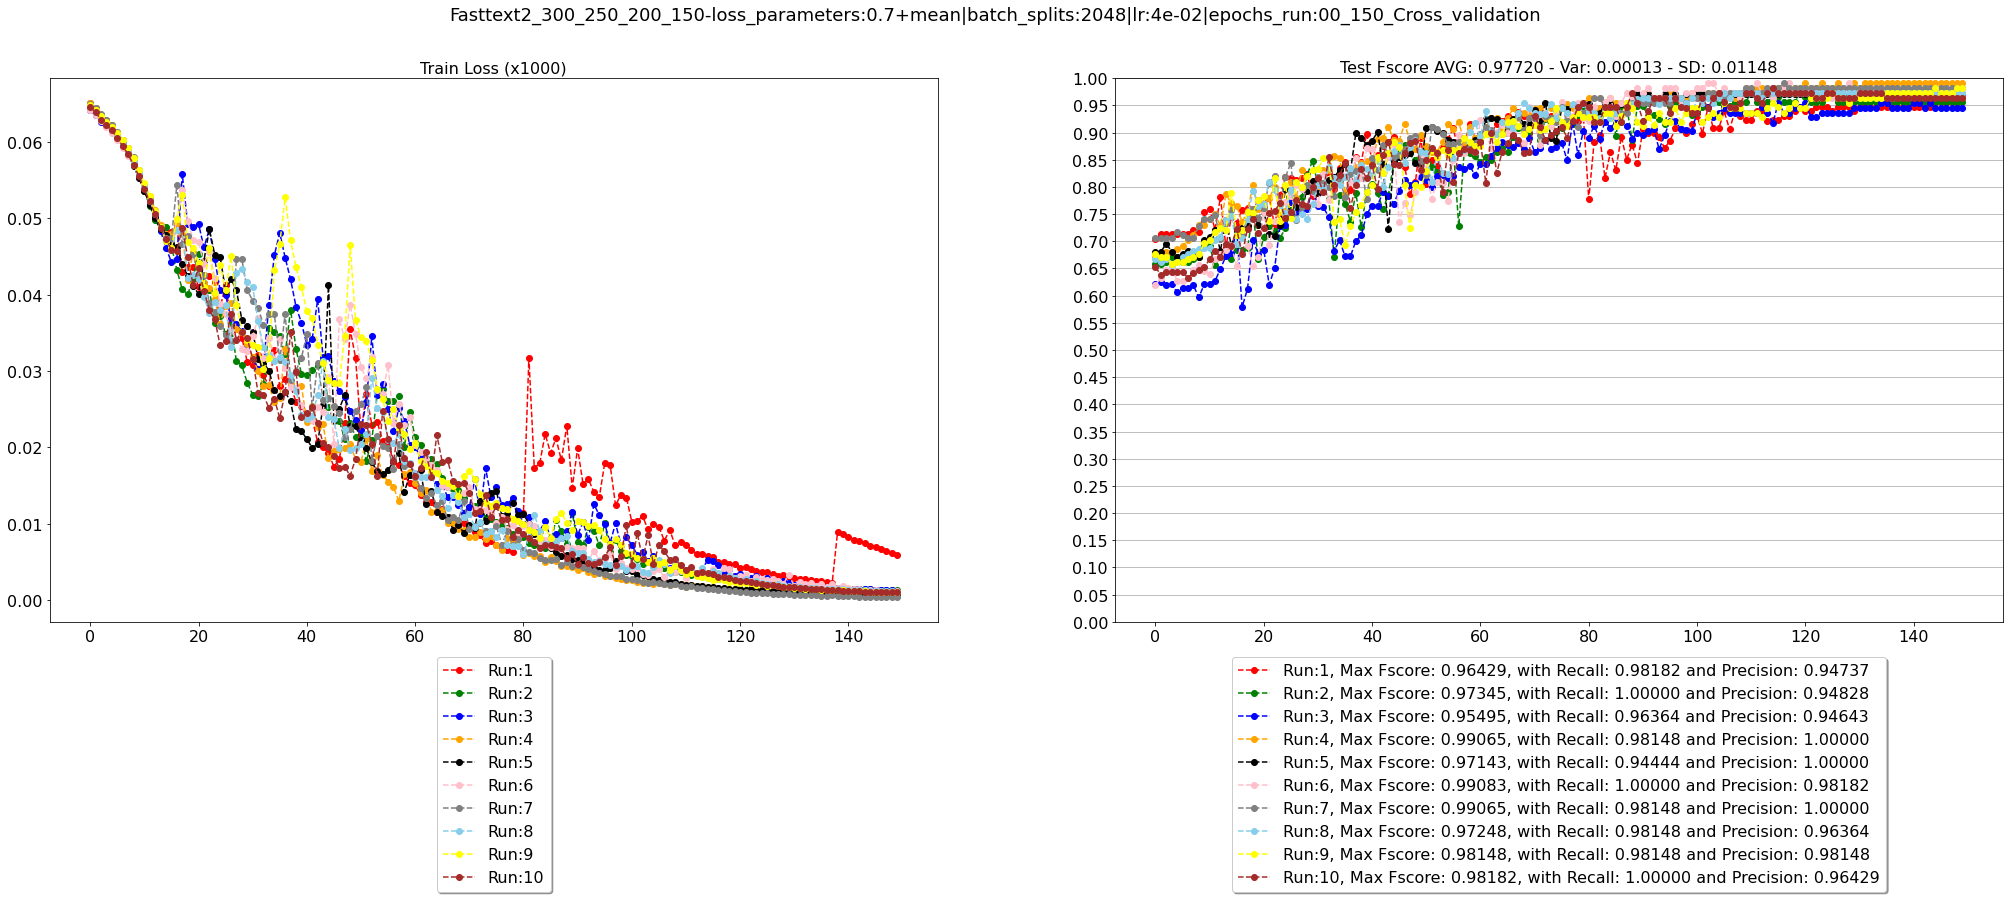

In [15]:
plot.plot_cv_details(2,"openml_203ds_datasets_matching","random","Fasttext2_300_250_200_150","sgd","CosineEmbeddingLoss")

## CV 4

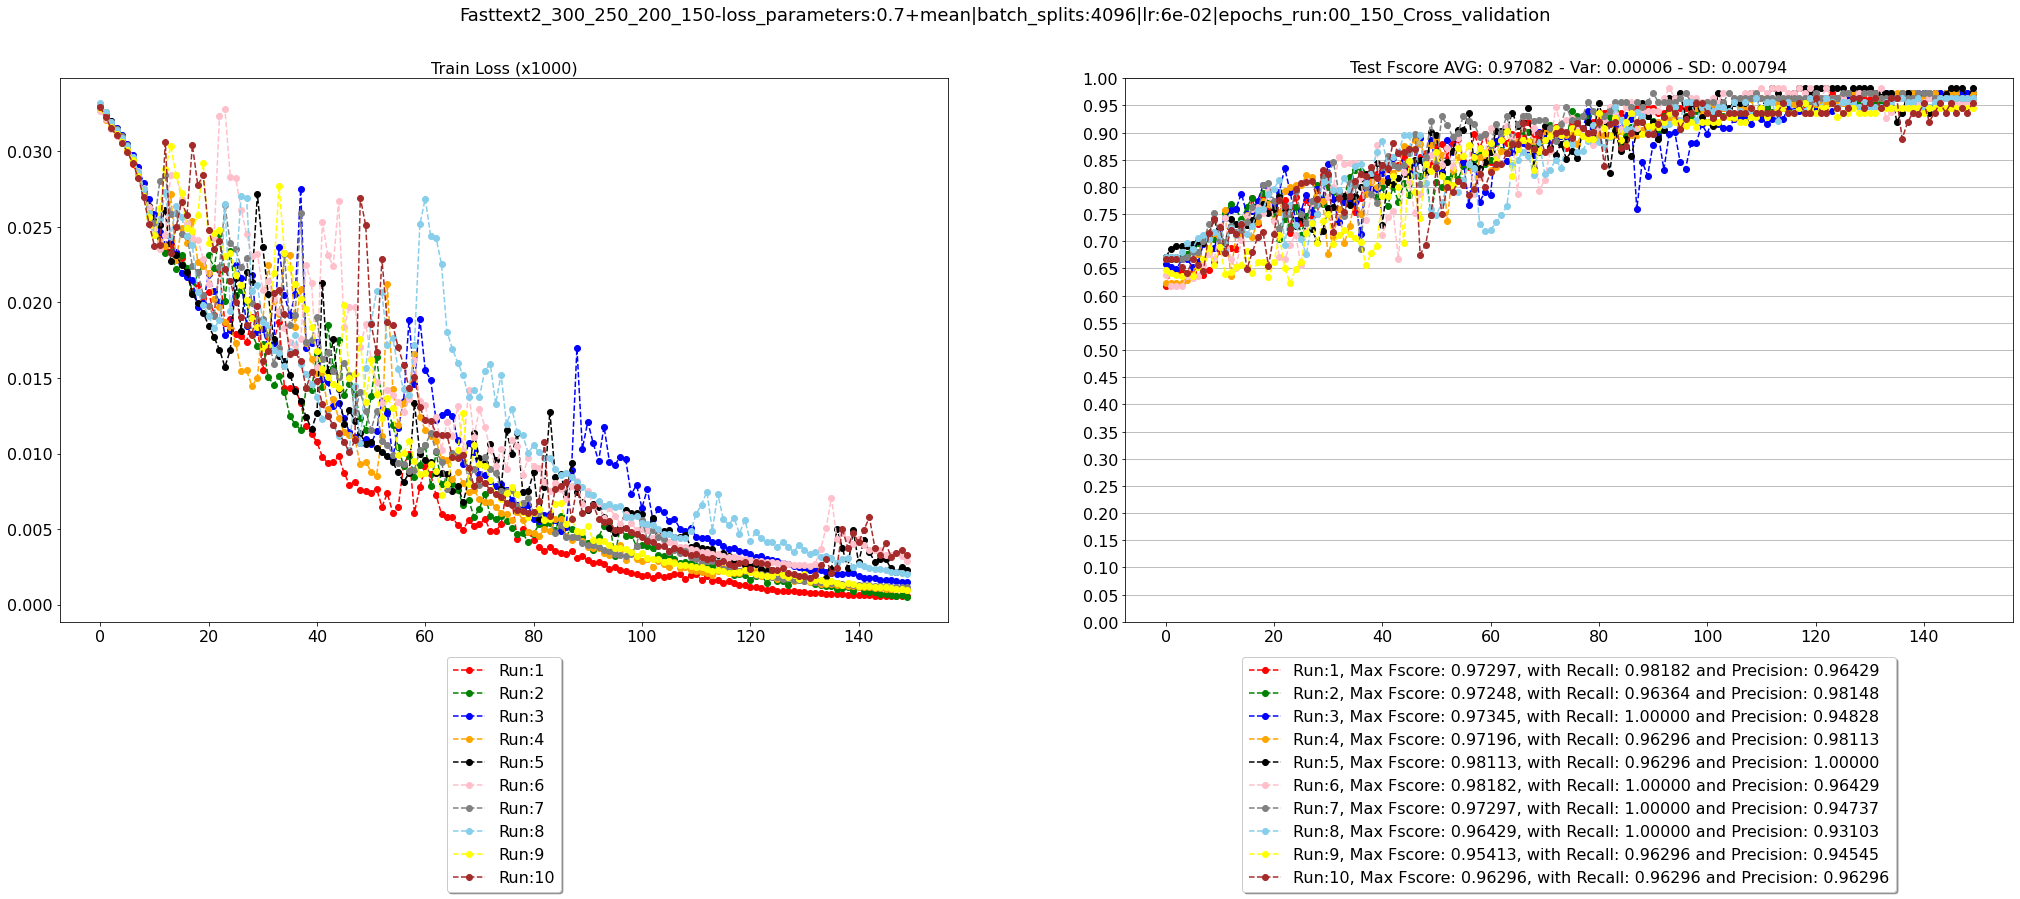

In [14]:
plot.plot_cv_details(4,"openml_203ds_datasets_matching","random","Fasttext2_300_250_200_150","sgd","CosineEmbeddingLoss")

## CV 8

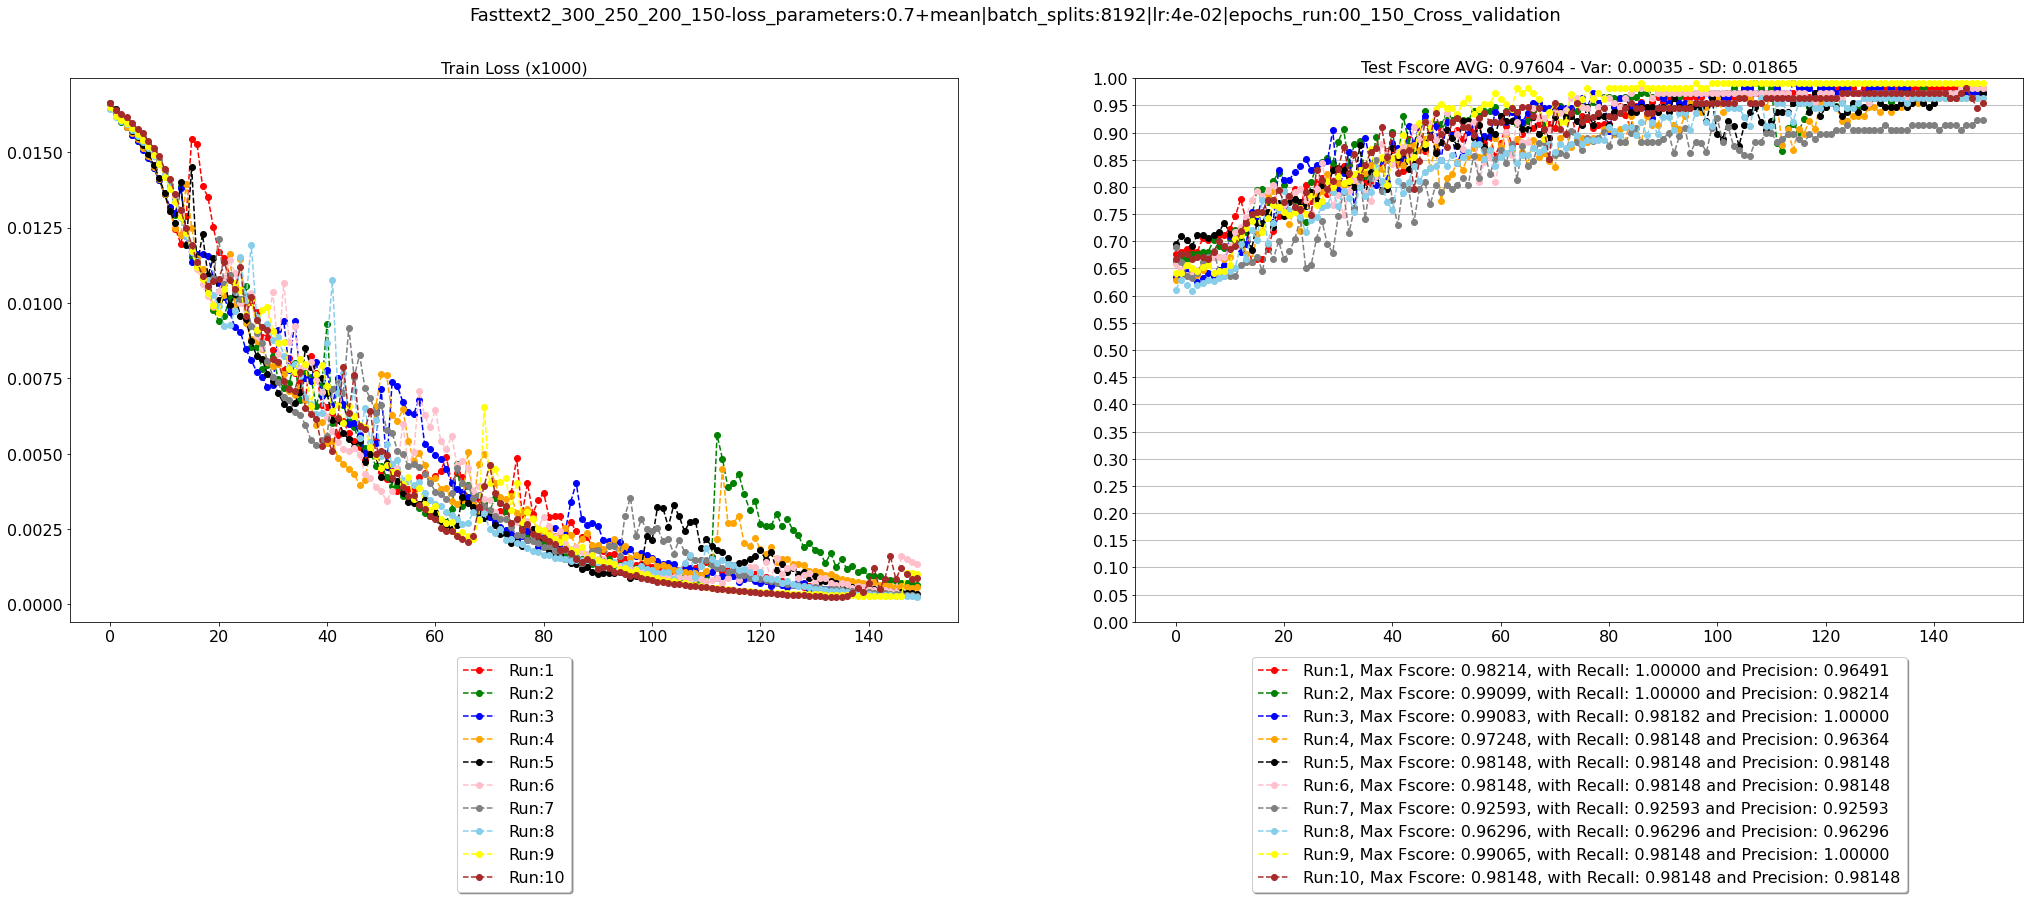

In [23]:
plot.plot_cv_details(8,"openml_203ds_datasets_matching","random","Fasttext2_300_250_200_150","sgd","CosineEmbeddingLoss")

## CV 16

## CV 24